<a href="https://colab.research.google.com/github/HansHenseler/masdav2024/blob/main/Part_7_Exercises_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing and visualising emails

Part 7

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2024

# Part 7

## 1 Importing python libs

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm, Normalize
pd.__version__

'2.1.4'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2 Read the Excel file containing Enron headers

Let's read the excel file containing headers of Enron emails

In [6]:
df = pd.read_excel( "/content/gdrive/MyDrive/Testdata/EnronEmails.xlsx" )
df

DocID                                               From  \
0       175231           m..presto@enron.com<m..presto@enron.com>   
1       232669  magdelena.cruz@enron.com<magdelena.cruz@enron....   
2       178812       becky.pitre@enron.com<becky.pitre@enron.com>   
3         5834           eric.bass@enron.com<eric.bass@enron.com>   
4       187302  cara.semperger@enron.com<cara.semperger@enron....   
...        ...                                                ...   
252960    4869  joanne.rozycki@enron.com<joanne.rozycki@enron....   
252961  215514         matt.smith@enron.com<matt.smith@enron.com>   
252962  219842         d..steffes@enron.com<d..steffes@enron.com>   
252963   10820         sally.beck@enron.com<sally.beck@enron.com>   
252964  221465             perfmgmt@enron.com<perfmgmt@enron.com>   

                                               Recipients  \
0             tim.belden@enron.com <tim.belden@enron.com>   
1                 e.taylor@enron.com <e.taylor@enron.com>   
2         richard.ring@enron.com <richard.ring@enron.com>   
3       shanna.husser@enron.com <shanna.husser@enron.c...   
4       shift.portland@enron.com <shift.portland@enron...   
...                                                   ...   
252960    susan.bailey@enron.com <susan.bailey@enron.com>   
252961          asalazar@pirnie.com <asalazar@pirnie.com>   
252962  c..williams@enron.com <c..williams@enron.com>;...   
252963            bob.hall@enron.com <bob.hall@enron.com>   
252964  stepenovitch@enron.com <stepenovitch@enron.com...   

                                                       Cc                Date  \
0                                                     NaN 2001-10-16 21:28:28   
1                                                     NaN 2001-07-12 18:23:41   
2                                                     NaN 2001-10-23 22:26:39   
3                                                     NaN 2000-08-07 13:51:00   
4                                                     NaN 2001-06-23 01:05:41   
...                                                   ...                 ...   
252960                                                NaN 2002-01-24 17:06:32   
252961                                                NaN 2001-02-28 17:08:00   
252962  wanda.curry@enron.com <wanda.curry@enron.com>;... 2001-10-10 23:18:22   
252963                                                NaN 2001-01-17 09:21:00   
252964                                                NaN 2001-05-22 07:47:00   

                                          Subject   CustodianName  \
0                                      Son Onofre        presto-k   
1                           FW: DB# User Feedback        taylor-m   
2                     FW: Termination Proceedings          ring-r   
3                                         Austin?          bass-e   
4                    IDAHO HAS A NEW NERC ACRONYM     salisbury-h   
...                                           ...             ...   
252960  Gerald Nemec is out of office thru Monday        bailey-s   
252961                                        RE:         smith-m   
252962                       RE: SCE Late Charges       steffes-j   
252963                          Re: Good Morning.          beck-s   
252964         Mid-Year 2001 Performance Feedback  stepenovitch-j   

               Location   Day  
0            sent_items  1749  
1       inbox\passwords  1653  
2                 inbox  1756  
3            _sent_mail  1314  
4                 inbox  1634  
...                 ...   ...  
252960    deleted_items  1849  
252961       _sent_mail  1519  
252962       sent_items  1743  
252963       _sent_mail  1477  
252964  inbox\work_mail  1602  

[252965 rows x 9 columns]

In [7]:
df.shape

(252965, 9)

## 2 Replace missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252965 entries, 0 to 252964
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DocID          252965 non-null  int64         
 1   From           252965 non-null  object        
 2   Recipients     243682 non-null  object        
 3   Cc             59630 non-null   object        
 4   Date           252965 non-null  datetime64[ns]
 5   Subject        244260 non-null  object        
 6   CustodianName  252965 non-null  object        
 7   Location       252957 non-null  object        
 8   Day            252965 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 17.4+ MB


We have values that are Null. Let's replace these with empty string

In [9]:
df.fillna("")

DocID                                               From  \
0       175231           m..presto@enron.com<m..presto@enron.com>   
1       232669  magdelena.cruz@enron.com<magdelena.cruz@enron....   
2       178812       becky.pitre@enron.com<becky.pitre@enron.com>   
3         5834           eric.bass@enron.com<eric.bass@enron.com>   
4       187302  cara.semperger@enron.com<cara.semperger@enron....   
...        ...                                                ...   
252960    4869  joanne.rozycki@enron.com<joanne.rozycki@enron....   
252961  215514         matt.smith@enron.com<matt.smith@enron.com>   
252962  219842         d..steffes@enron.com<d..steffes@enron.com>   
252963   10820         sally.beck@enron.com<sally.beck@enron.com>   
252964  221465             perfmgmt@enron.com<perfmgmt@enron.com>   

                                               Recipients  \
0             tim.belden@enron.com <tim.belden@enron.com>   
1                 e.taylor@enron.com <e.taylor@enron.com>   
2         richard.ring@enron.com <richard.ring@enron.com>   
3       shanna.husser@enron.com <shanna.husser@enron.c...   
4       shift.portland@enron.com <shift.portland@enron...   
...                                                   ...   
252960    susan.bailey@enron.com <susan.bailey@enron.com>   
252961          asalazar@pirnie.com <asalazar@pirnie.com>   
252962  c..williams@enron.com <c..williams@enron.com>;...   
252963            bob.hall@enron.com <bob.hall@enron.com>   
252964  stepenovitch@enron.com <stepenovitch@enron.com...   

                                                       Cc                Date  \
0                                                         2001-10-16 21:28:28   
1                                                         2001-07-12 18:23:41   
2                                                         2001-10-23 22:26:39   
3                                                         2000-08-07 13:51:00   
4                                                         2001-06-23 01:05:41   
...                                                   ...                 ...   
252960                                                    2002-01-24 17:06:32   
252961                                                    2001-02-28 17:08:00   
252962  wanda.curry@enron.com <wanda.curry@enron.com>;... 2001-10-10 23:18:22   
252963                                                    2001-01-17 09:21:00   
252964                                                    2001-05-22 07:47:00   

                                          Subject   CustodianName  \
0                                      Son Onofre        presto-k   
1                           FW: DB# User Feedback        taylor-m   
2                     FW: Termination Proceedings          ring-r   
3                                         Austin?          bass-e   
4                    IDAHO HAS A NEW NERC ACRONYM     salisbury-h   
...                                           ...             ...   
252960  Gerald Nemec is out of office thru Monday        bailey-s   
252961                                        RE:         smith-m   
252962                       RE: SCE Late Charges       steffes-j   
252963                          Re: Good Morning.          beck-s   
252964         Mid-Year 2001 Performance Feedback  stepenovitch-j   

               Location   Day  
0            sent_items  1749  
1       inbox\passwords  1653  
2                 inbox  1756  
3            _sent_mail  1314  
4                 inbox  1634  
...                 ...   ...  
252960    deleted_items  1849  
252961       _sent_mail  1519  
252962       sent_items  1743  
252963       _sent_mail  1477  
252964  inbox\work_mail  1602  

[252965 rows x 9 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252965 entries, 0 to 252964
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DocID          252965 non-null  int64         
 1   From           252965 non-null  object        
 2   Recipients     243682 non-null  object        
 3   Cc             59630 non-null   object        
 4   Date           252965 non-null  datetime64[ns]
 5   Subject        244260 non-null  object        
 6   CustodianName  252965 non-null  object        
 7   Location       252957 non-null  object        
 8   Day            252965 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 17.4+ MB


## 3 List custodians and number of emails per custodian

Example: how many emails for custodian beck-s?

In [11]:
df[df.CustodianName=="beck-s"].shape[0]

4833

In [12]:
# List the custodians using value_counts

custodians = pd.DataFrame(df['CustodianName'].value_counts()).rename(columns={"CustodianName": "Count"})
custodians

count
CustodianName       
dasovich-j     15776
kaminski-v     11228
jones-t        10148
shackleton-s    9236
mann-k          7461
...              ...
slinger-r        121
solberg-g         87
south-s           57
phanis-s          26
merriss-s         14

[150 rows x 1 columns]

## 4 Filter email subjects on keyword

Select all emails that have the word blockbuster or enron in the subject

In [13]:
df[df['Subject'].str.contains("[bB]lockbuster|[eE]nron",na=False)].shape[0]

11473

## 5 Create a timeline of email count between 1-1-1999 and 1-1-2002

Create a histogram showing the number of emails per day

In [14]:
# Create a Day column

df['Day']=df['Date'].dt.date
df

DocID                                               From  \
0       175231           m..presto@enron.com<m..presto@enron.com>   
1       232669  magdelena.cruz@enron.com<magdelena.cruz@enron....   
2       178812       becky.pitre@enron.com<becky.pitre@enron.com>   
3         5834           eric.bass@enron.com<eric.bass@enron.com>   
4       187302  cara.semperger@enron.com<cara.semperger@enron....   
...        ...                                                ...   
252960    4869  joanne.rozycki@enron.com<joanne.rozycki@enron....   
252961  215514         matt.smith@enron.com<matt.smith@enron.com>   
252962  219842         d..steffes@enron.com<d..steffes@enron.com>   
252963   10820         sally.beck@enron.com<sally.beck@enron.com>   
252964  221465             perfmgmt@enron.com<perfmgmt@enron.com>   

                                               Recipients  \
0             tim.belden@enron.com <tim.belden@enron.com>   
1                 e.taylor@enron.com <e.taylor@enron.com>   
2         richard.ring@enron.com <richard.ring@enron.com>   
3       shanna.husser@enron.com <shanna.husser@enron.c...   
4       shift.portland@enron.com <shift.portland@enron...   
...                                                   ...   
252960    susan.bailey@enron.com <susan.bailey@enron.com>   
252961          asalazar@pirnie.com <asalazar@pirnie.com>   
252962  c..williams@enron.com <c..williams@enron.com>;...   
252963            bob.hall@enron.com <bob.hall@enron.com>   
252964  stepenovitch@enron.com <stepenovitch@enron.com...   

                                                       Cc                Date  \
0                                                     NaN 2001-10-16 21:28:28   
1                                                     NaN 2001-07-12 18:23:41   
2                                                     NaN 2001-10-23 22:26:39   
3                                                     NaN 2000-08-07 13:51:00   
4                                                     NaN 2001-06-23 01:05:41   
...                                                   ...                 ...   
252960                                                NaN 2002-01-24 17:06:32   
252961                                                NaN 2001-02-28 17:08:00   
252962  wanda.curry@enron.com <wanda.curry@enron.com>;... 2001-10-10 23:18:22   
252963                                                NaN 2001-01-17 09:21:00   
252964                                                NaN 2001-05-22 07:47:00   

                                          Subject   CustodianName  \
0                                      Son Onofre        presto-k   
1                           FW: DB# User Feedback        taylor-m   
2                     FW: Termination Proceedings          ring-r   
3                                         Austin?          bass-e   
4                    IDAHO HAS A NEW NERC ACRONYM     salisbury-h   
...                                           ...             ...   
252960  Gerald Nemec is out of office thru Monday        bailey-s   
252961                                        RE:         smith-m   
252962                       RE: SCE Late Charges       steffes-j   
252963                          Re: Good Morning.          beck-s   
252964         Mid-Year 2001 Performance Feedback  stepenovitch-j   

               Location         Day  
0            sent_items  2001-10-16  
1       inbox\passwords  2001-07-12  
2                 inbox  2001-10-23  
3            _sent_mail  2000-08-07  
4                 inbox  2001-06-23  
...                 ...         ...  
252960    deleted_items  2002-01-24  
252961       _sent_mail  2001-02-28  
252962       sent_items  2001-10-10  
252963       _sent_mail  2001-01-17  
252964  inbox\work_mail  2001-05-22  

[252965 rows x 9 columns]

In [15]:
import datetime

# we clean up the dates and leave out anything before 1-1-1999 or after 1-1-2002
clean_df = df[(df['Day'] > datetime.date(1999,1,1)) & (df['Day'] < datetime.date(2002,1,1))]

# instead of a pivot we can use value_counts()
emails_per_day = clean_df['Day'].value_counts()

# but we need to change the output into a dataframe and set index plus column names
emails_per_day = emails_per_day.rename_axis('Day').to_frame('Count')
emails_per_day

Count
Day              
2001-10-25   2023
2001-11-27   1984
2001-10-26   1940
2001-10-24   1860
2001-11-20   1835
...           ...
1999-04-20      1
1999-11-25      1
1999-06-05      1
1999-04-28      1
1999-03-03      1

[1018 rows x 1 columns]

Let's plot this selection

<Axes: xlabel='Day'>

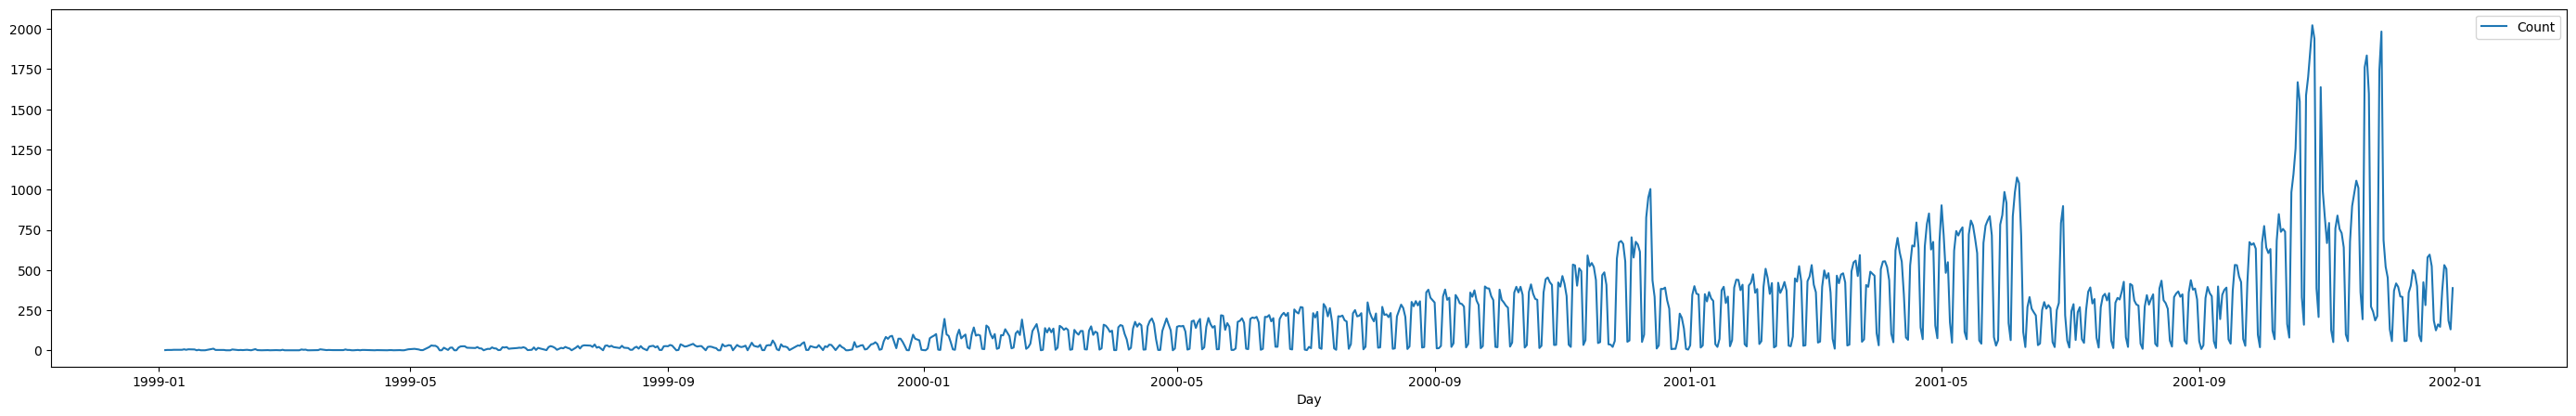

In [ ]:
emails_per_day.plot(kind='line',y='Count',figsize=(35,5))

## 6 Network visualisation

Use the networkx library https://networkx.org/

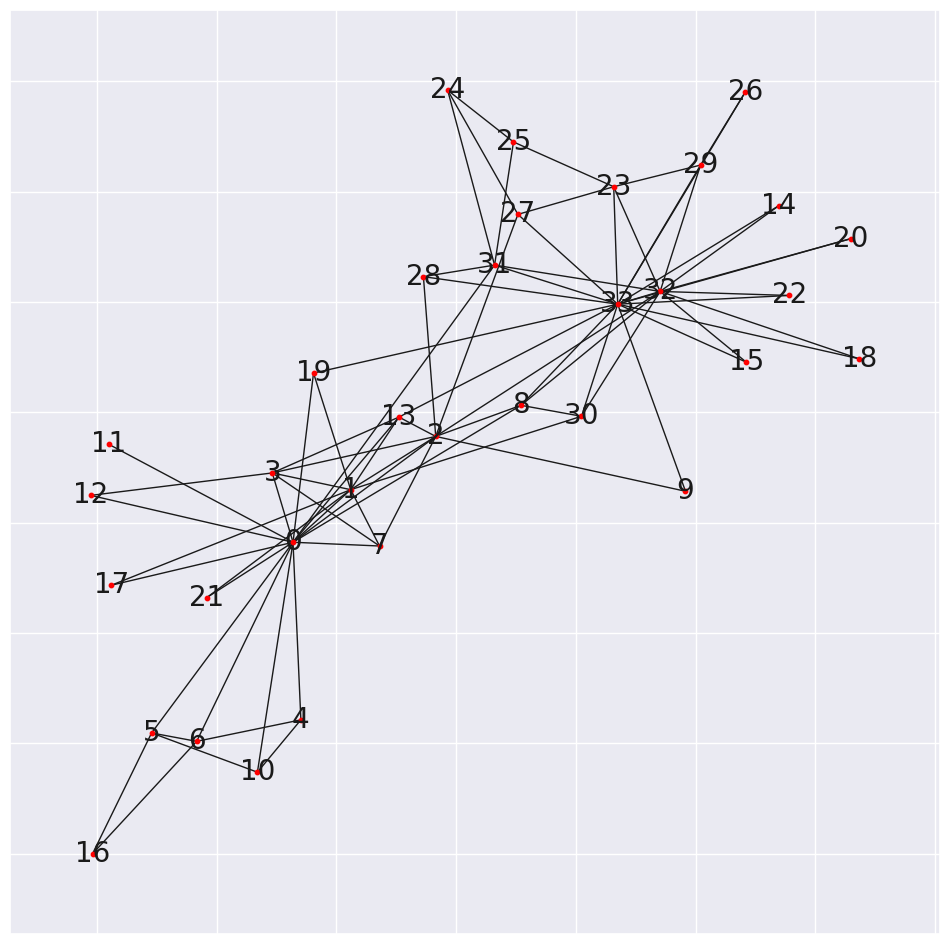

In [50]:
import networkx as nx

# networkx has some sample datasets available. Here is the Karate Club dataset:
# see http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary

plt.figure(figsize=(12,12))
Gk = nx.karate_club_graph()
nx.draw_networkx(Gk,node_size=10,node_color='red',with_labels=True, font_size=20)
plt.show()


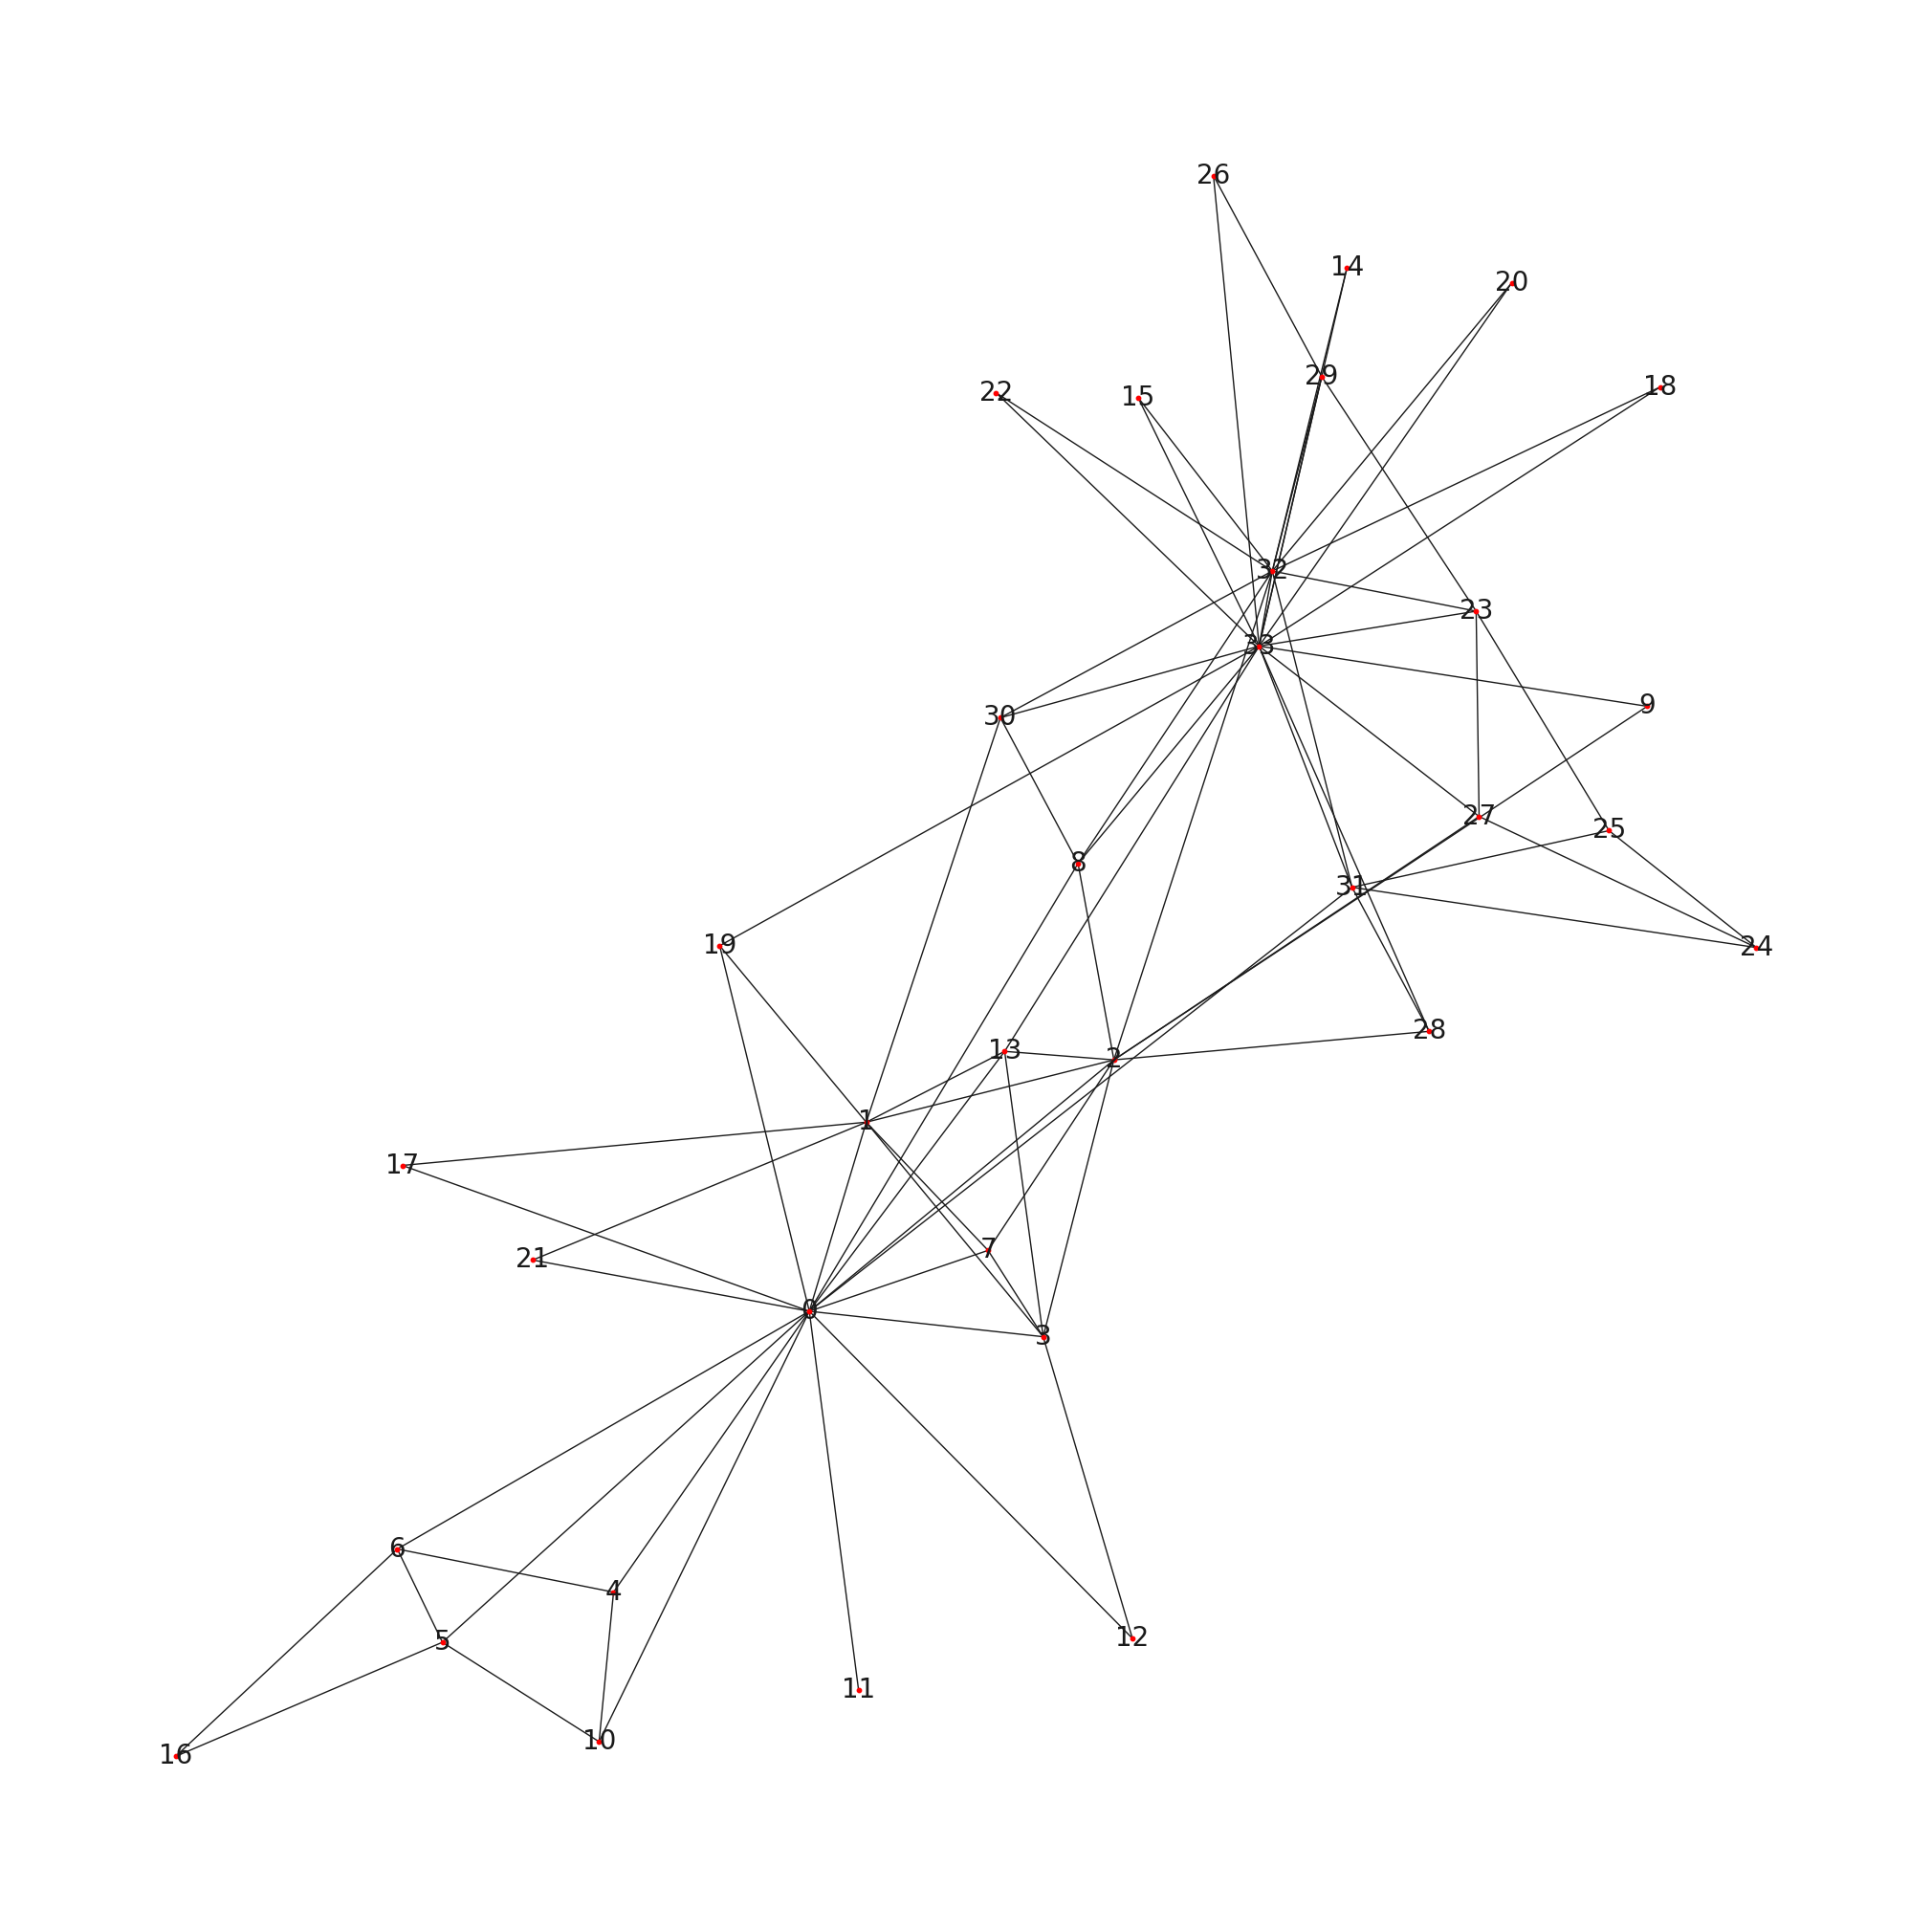

In [ ]:
# More networkx visualisations (see https://networkx.org/documentation/stable/reference/drawing.html)

nx.draw(Gk, pos=nx.fruchterman_reingold_layout(Gk), node_size=10,node_color='red',with_labels=True,font_size=20)
#nx.draw(Gk, pos=nx.spring_layout(Gk), node_size=10,node_color='red',with_labels=True,font_size=20)
#nx.draw_spectral(Gk,node_size=10,node_color='red',with_labels=True,font_size=2)
#nx.draw_circular(Gk,node_size=10,node_color='red',with_labels=True,font_size=20)

In [47]:
# Let's try on our email data

# See https://networkx.org/documentation/stable/reference/convert.html

# Read the relations (edges)
relations = pd.read_excel('/content/gdrive/MyDrive/Testdata/Relations.xlsx')
relations



From  To_Cc  CountOfDocId
0           1      1             2
1           1      2            33
2           1     26             5
3           1     28             8
4           1     29            15
...       ...    ...           ...
357044  84618  13581             1
357045  84619  27426             1
357046  84621    581             1
357047  84622    581             1
357048  84627  36389             1

[357049 rows x 3 columns]

In [48]:
# Read the addresses from our emails (vertices)

addresses = pd.read_excel('/content/gdrive/MyDrive/Testdata/Addresses.xlsx')
addresses.set_index(['AddressId'],inplace=True)
addresses

Count                                     Address  CustodianID
AddressId                                                                
1           2185                         m..presto@enron.com          NaN
2           3446                        tim.belden@enron.com          NaN
3             41                    magdelena.cruz@enron.com          NaN
4            585                          e.taylor@enron.com          NaN
5             76                       becky.pitre@enron.com          NaN
...          ...                                         ...          ...
84625          1                sellers'.'prentice@enron.com          NaN
84626          1                    sue_nord@enron.enron.net          NaN
84627          1  ceg_ir-sec.um.a.2.105072@joinmail.ccbn.com          NaN
84628          1                        lmlovett@swidlaw.com          NaN
84629          1                      stepenovitch@enron.com          NaN

[84629 rows x 3 columns]

In [ ]:
# Put our relations in nx, only take a selection otherwise drawing will take too long

G = nx.from_pandas_edgelist(relations[357000:357048], source='From', target='To_Cc')

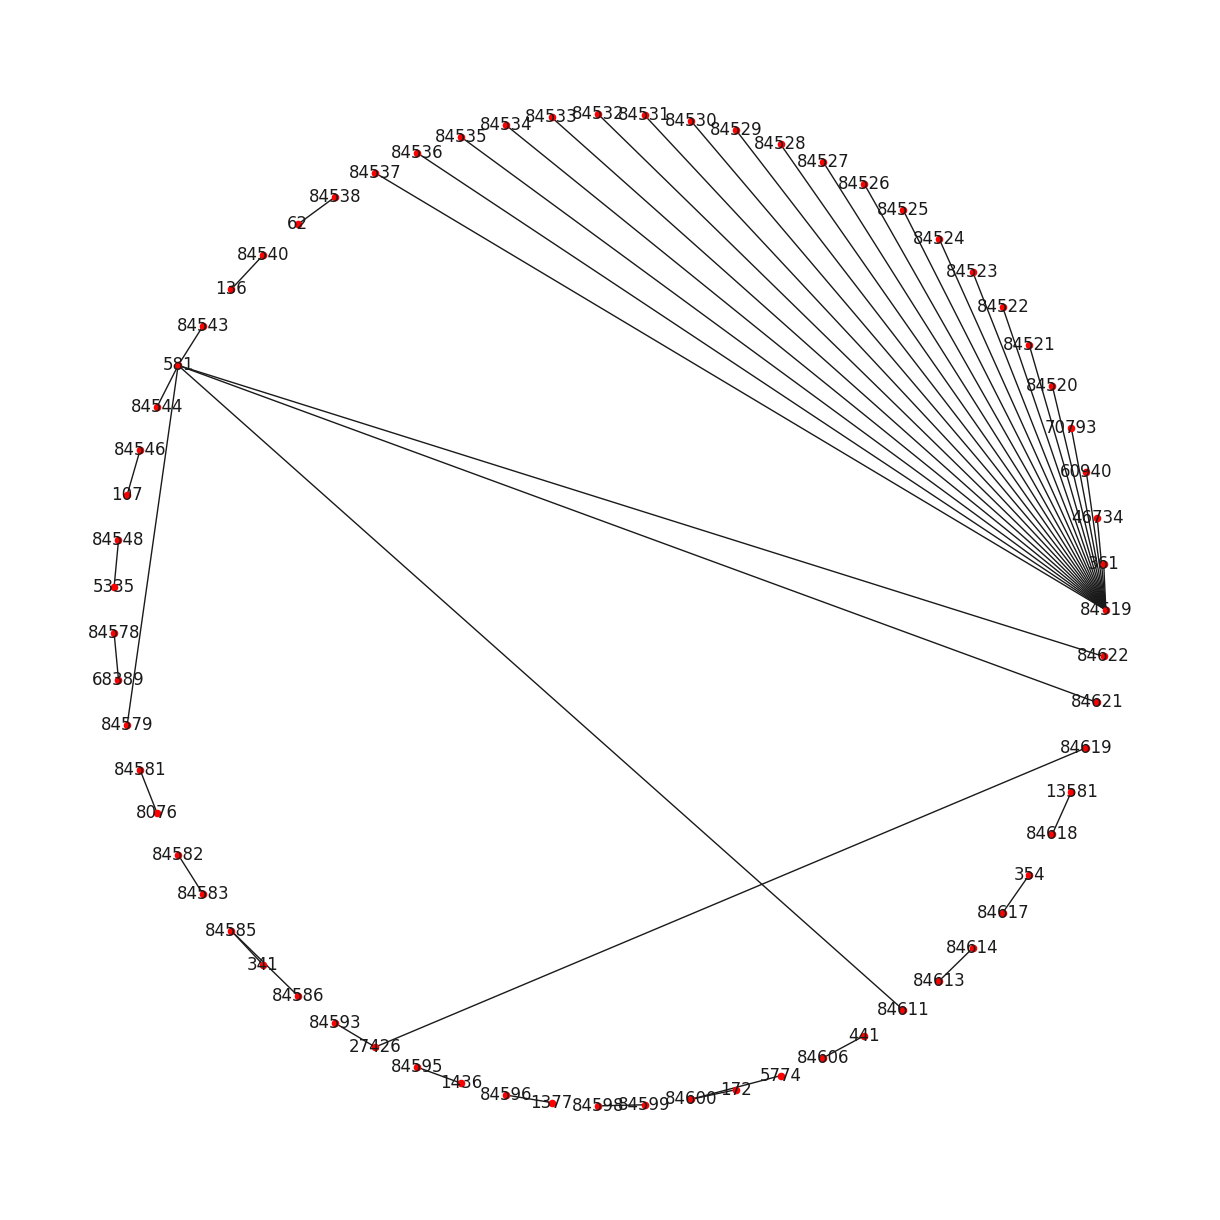

In [ ]:
plt.figure(figsize=(12,12))
nx.draw_circular(G,node_size=20,node_color='red',with_labels=True,font_size=12)
plt.show()

### Degree centrality

Degree centrality defines the importance of a node based on the degree of that node. The higher the degree, the more crucial it becomes in the graph. It’s used to find popular individuals, the most connected individuals, individuals who connect quickly in a wider network, or the ones that hold the most information.

In [57]:
# Degree centrality is easy to calculate. We can take the whole relations table as a graph

G_all = nx.from_pandas_edgelist(relations, source='From', target='To_Cc')

degree = nx.algorithms.centrality.degree_centrality(G_all)
def top10(list):
    i = 0
    for w in sorted(list, key=list.get, reverse=True):
        print(degree[w],'\t',addresses.loc[w]['Address'],' (id:',w,')')
        i+=1
        if i==10:
          break

top10(degree)


0.020947565809774738 	 kenneth.lay@enron.com  (id: 361 )
0.019048636331268246 	 sally.beck@enron.com  (id: 38 )
0.018621377198604287 	 outlook.team@enron.com  (id: 532 )
0.017921146953405017 	 jeff.dasovich@enron.com  (id: 49 )
0.01786180540720169 	 david.forster@enron.com  (id: 338 )
0.01767191245935104 	 jeff.skilling@enron.com  (id: 172 )
0.0159628759286952 	 klay@enron.com  (id: 581 )
0.01488285978779463 	 technology.enron@enron.com  (id: 48720 )
0.013458662678914761 	 tana.jones@enron.com  (id: 278 )
0.012616012722827506 	 sara.shackleton@enron.com  (id: 218 )


In [ ]:
# Let's create a graph by taking all relations from the top 3 id's into account leaving out 532

important_persons = relations[(\
           (relations.From==361) |\
           (relations.From==38) |\
           (relations.From==49) |\
           (relations.To_Cc==361) |\
           (relations.To_Cc==38) |\
           (relations.To_Cc==49)
           )]

G_important = nx.from_pandas_edgelist(important_persons, source='From', target='To_Cc')
important_persons

From  To_Cc  CountOfDocId
288         2     38             2
294         2     49            13
754         6     49             2
1104        9     38             1
1125        9    361             1
...       ...    ...           ...
356902  84169    361             1
356909  84198    361             1
356950  84327     38             1
356981  84412    361             1
357000  84519    361             1

[5783 rows x 3 columns]

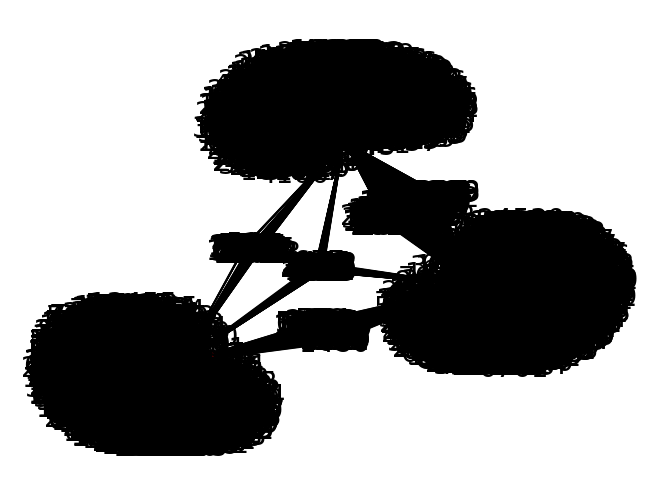

In [ ]:
# 5783 edges is a pretty large network to draw in our Colab note book but it works...

nx.draw(G_important, pos=nx.fruchterman_reingold_layout(G_important), node_size=10,node_color='red',with_labels=True,font_size=20)


### Betweenness Centrality

Betweenness centrality defines the importance of any node based on the number of times it occurs in the shortest paths between other nodes. It measures the percent of the shortest path in a network and where a particular node lies in it.

In [ ]:
# betweenness is more complicated but it works after waiting 2 minutes

betweenness = nx.algorithms.centrality.betweenness_centrality(G_important)
top10(betweenness)

0.020947565809774738 	 kenneth.lay@enron.com  (id: 361 )
0.017921146953405017 	 jeff.dasovich@enron.com  (id: 49 )
0.019048636331268246 	 sally.beck@enron.com  (id: 38 )
0.005186451138170857 	 tim.belden@enron.com  (id: 2 )
0.003548624462959007 	 lloyd.will@enron.com  (id: 32 )
0.004711718768544234 	 m..presto@enron.com  (id: 1 )
0.007583849604785302 	 elizabeth.sager@enron.com  (id: 29 )
0.005649315198556814 	 david.delainey@enron.com  (id: 141 )
0.0032281801134610363 	 janet.dietrich@enron.com  (id: 142 )
0.003263785041183033 	 dan.leff@enron.com  (id: 143 )


### Closeness Centrality

Closeness centrality identifies a node's importance based on how close it is to all the other nodes in the graph. The closeness is also known as geodesic distance (GD), which is the number of links included in the shortest path between two nodes.

In [ ]:
closeness = nx.algorithms.centrality.closeness_centrality(G_important)
top10(closeness)

0.020947565809774738 	 kenneth.lay@enron.com  (id: 361 )
0.019048636331268246 	 sally.beck@enron.com  (id: 38 )
0.017921146953405017 	 jeff.dasovich@enron.com  (id: 49 )
0.005186451138170857 	 tim.belden@enron.com  (id: 2 )
0.003548624462959007 	 lloyd.will@enron.com  (id: 32 )
0.004711718768544234 	 m..presto@enron.com  (id: 1 )
0.005649315198556814 	 david.delainey@enron.com  (id: 141 )
0.0032281801134610363 	 janet.dietrich@enron.com  (id: 142 )
0.003263785041183033 	 dan.leff@enron.com  (id: 143 )
0.002824657599278407 	 don.black@enron.com  (id: 144 )


### Eigenvector Centrality

Eigenvector centrality defines a node's importance based on the function of its neighboring nodes. For instance, consider a node in a network. Check all the nodes it’s connected to. If a node is linked to or surrounded by highly important nodes in a network, it ought to have a high eigenvector centrality score. It’s what makes it an important part of the whole network.

In [ ]:
# We have to use the smaller network G because the G_important is too large for the eigenvector centrality calculation

# NB If you try G_important you will get the following error:
# PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

eigenvector = nx.algorithms.centrality.eigenvector_centrality(G)
top10(eigenvector)

0.00026110280329464264 	 maria.barnet@myhomekey.com  (id: 84519 )
0.020947565809774738 	 kenneth.lay@enron.com  (id: 361 )
2.373661848133115e-05 	 jstrom@hvllc.com  (id: 46734 )
2.373661848133115e-05 	 lwbickle@hvllc.com  (id: 60940 )
2.373661848133115e-05 	 cjones@hvllc.com  (id: 70793 )
1.1868309240665575e-05 	 betty.hung@gs.com  (id: 84520 )
1.1868309240665575e-05 	 bryant.tong@pge-corp.com  (id: 84521 )
1.1868309240665575e-05 	 christensenl@dteenergy.com  (id: 84522 )
1.1868309240665575e-05 	 deforestco@aol.com  (id: 84523 )
1.1868309240665575e-05 	 ira@technologypartners.com  (id: 84524 )


# Exercises


## 1 Heatmap showing number of emails per custodian per day from 1-1-1999 to 1-1-2002

In [36]:
# create a new column Count with value=1 so that we can use it to count in a pivot operation
clean_df['Count']=1
emails_per_custodian_day = pd.pivot_table( clean_df , values='Count',columns='CustodianName',index='Day', aggfunc="count")
emails_per_custodian_day.fillna(0,inplace=True)
emails_per_custodian_day

<ipython-input-36-f29e89d61a2e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CustodianName  allen-p  arnold-j  arora-h  badeer-r  bailey-s  bass-e  \
Day                                                                     
1999-01-04         0.0       0.0      0.0       0.0       0.0     0.0   
1999-01-05         0.0       0.0      0.0       0.0       0.0     0.0   
1999-01-06         0.0       0.0      0.0       0.0       0.0     0.0   
1999-01-07         0.0       0.0      0.0       0.0       0.0     0.0   
1999-01-08         0.0       0.0      0.0       0.0       0.0     0.0   
...                ...       ...      ...       ...       ...     ...   
2001-12-27         6.0      12.0      9.0       0.0       0.0    13.0   
2001-12-28         8.0       7.0      7.0       0.0       0.0    17.0   
2001-12-29         3.0       3.0      5.0       0.0       0.0     6.0   
2001-12-30         3.0       3.0      0.0       0.0       0.0     4.0   
2001-12-31         5.0       6.0      2.0       0.0       0.0     7.0   

CustodianName  baughman-d  beck-s  benson-r  blair-l  ...  whalley-g  \
Day                                                   ...              
1999-01-04            0.0     0.0       0.0      0.0  ...        0.0   
1999-01-05            0.0     0.0       0.0      0.0  ...        0.0   
1999-01-06            0.0     0.0       0.0      0.0  ...        0.0   
1999-01-07            0.0     0.0       0.0      0.0  ...        0.0   
1999-01-08            0.0     0.0       0.0      0.0  ...        0.0   
...                   ...     ...       ...      ...  ...        ...   
2001-12-27           18.0     1.0       0.0     39.0  ...        0.0   
2001-12-28           10.0     3.0       2.0     36.0  ...        0.0   
2001-12-29            6.0     0.0       0.0      6.0  ...        0.0   
2001-12-30            7.0     0.0       1.0      7.0  ...        0.0   
2001-12-31           10.0     7.0       0.0     30.0  ...        0.0   

CustodianName  whalley-l  white-s  whitt-m  williams-j  williams-w3  wolfe-j  \
Day                                                                            
1999-01-04           0.0      0.0      0.0         0.0          0.0      0.0   
1999-01-05           0.0      0.0      0.0         0.0          0.0      0.0   
1999-01-06           0.0      0.0      0.0         0.0          0.0      0.0   
1999-01-07           0.0      0.0      0.0         0.0          0.0      0.0   
1999-01-08           0.0      0.0      0.0         0.0          0.0      0.0   
...                  ...      ...      ...         ...          ...      ...   
2001-12-27           0.0     11.0      2.0         0.0         25.0      0.0   
2001-12-28           0.0     11.0      3.0         0.0         24.0      0.0   
2001-12-29           0.0      5.0      0.0         0.0         24.0      0.0   
2001-12-30           0.0      1.0      0.0         0.0         24.0      0.0   
2001-12-31           0.0      7.0      0.0         0.0         23.0      0.0   

CustodianName  ybarbo-p  zipper-a  zufferli-j  
Day                                            
1999-01-04          0.0       0.0         0.0  
1999-01-05          0.0       0.0         0.0  
1999-01-06          0.0       0.0         0.0  
1999-01-07          0.0       0.0         0.0  
1999-01-08          0.0       0.0         0.0  
...                 ...       ...         ...  
2001-12-27          0.0       0.0         0.0  
2001-12-28          0.0       4.0         0.0  
2001-12-29          0.0       0.0         0.0  
2001-12-30          0.0       0.0         0.0  
2001-12-31          0.0       3.0         0.0  

[1018 rows x 149 columns]

<Axes: xlabel='Day', ylabel='CustodianName'>

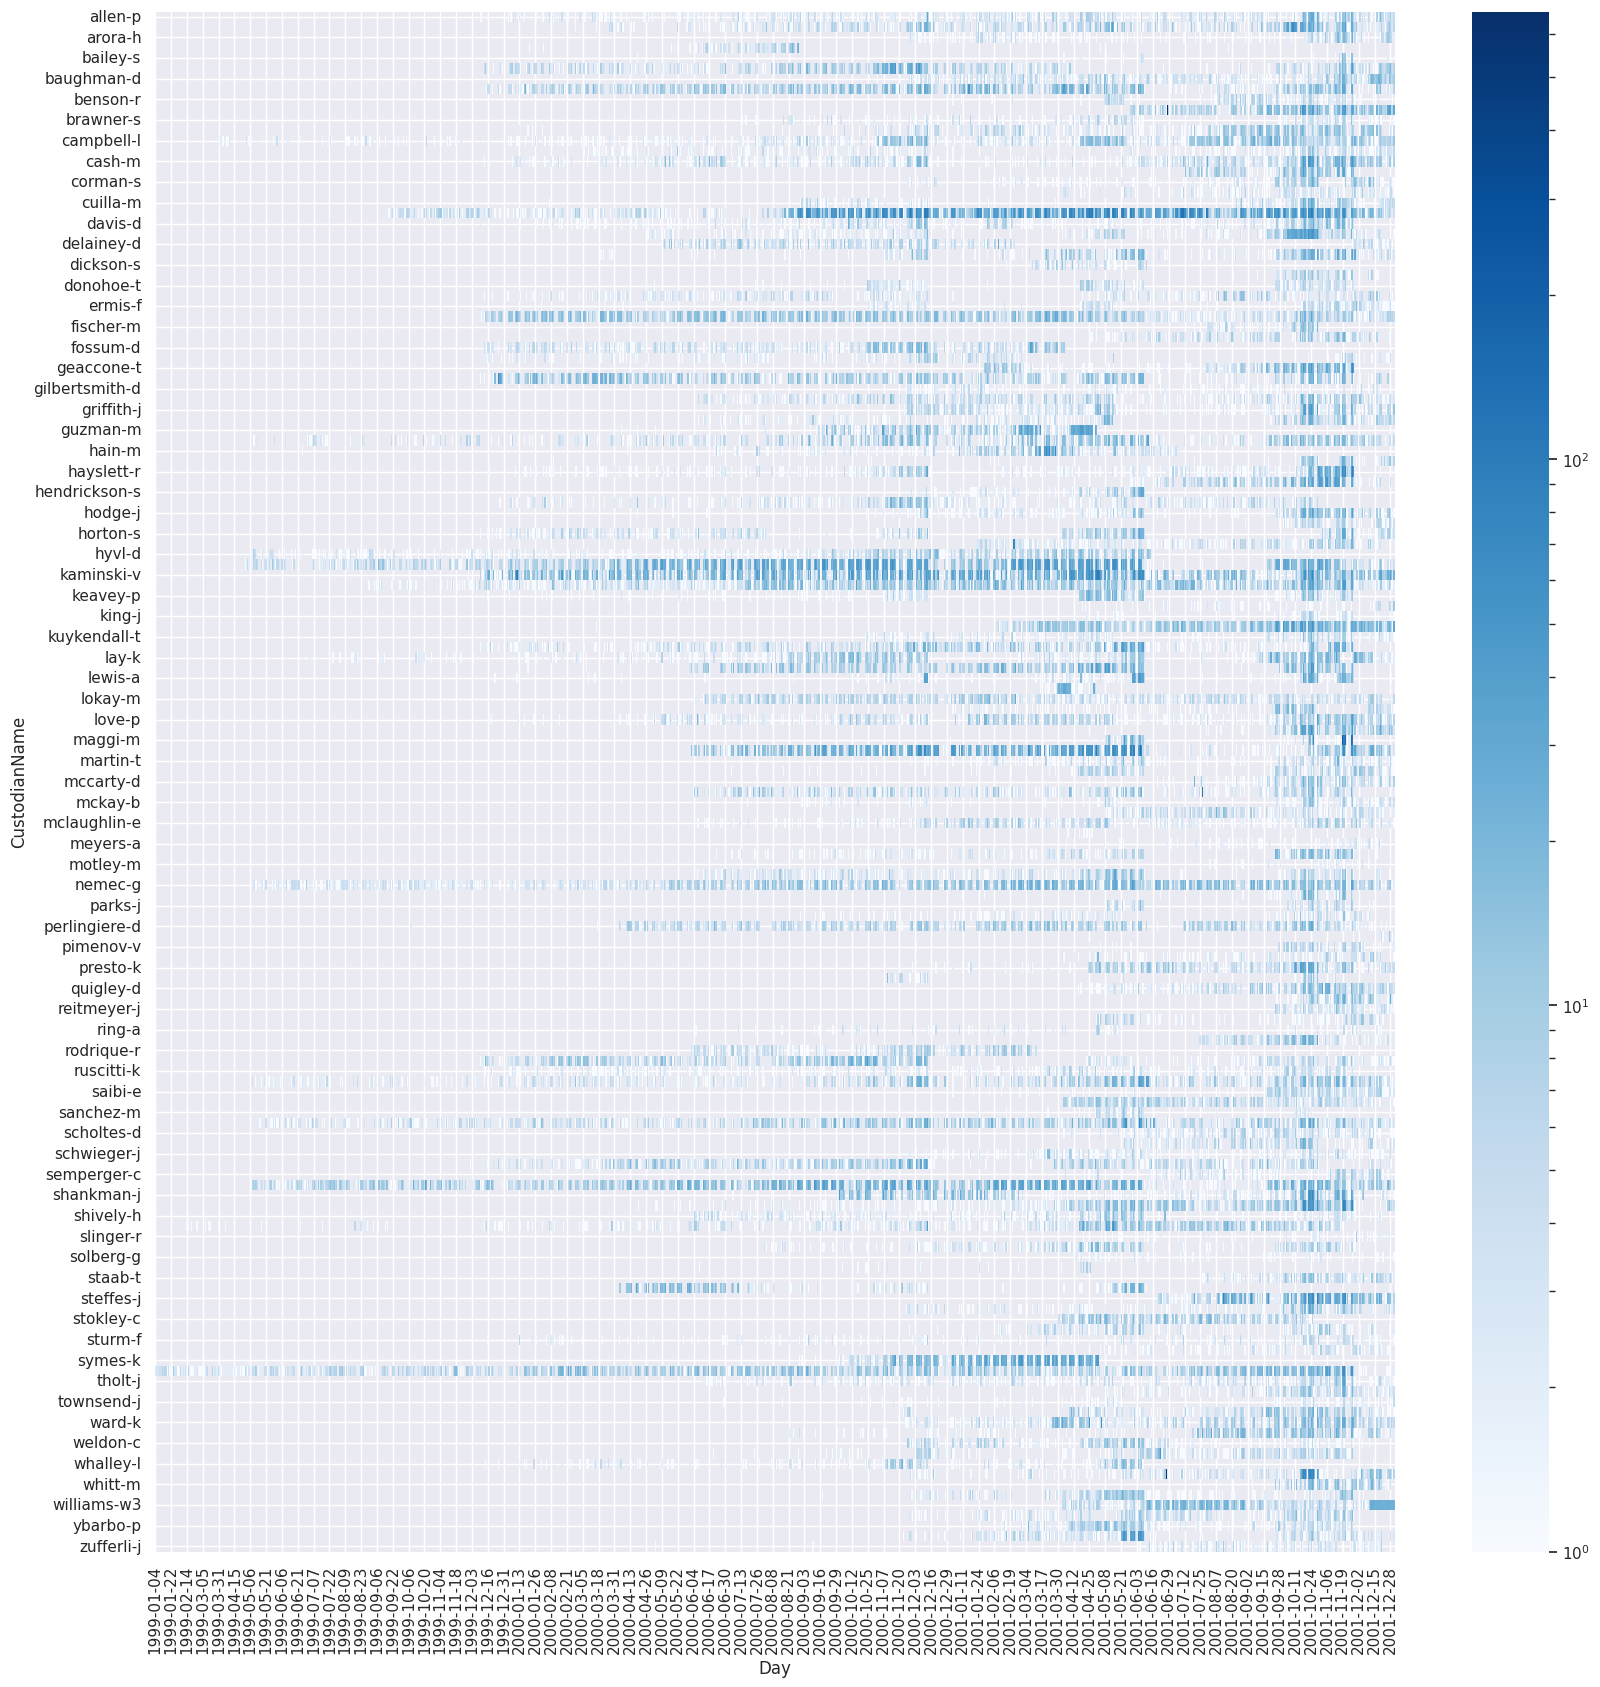

In [17]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(emails_per_custodian_day.transpose(), cmap="Blues",norm=LogNorm())


## 2 Create a treemap based on CustodianName and using number of emails per custodian as Size

In [19]:
custodians = pd.DataFrame(clean_df['CustodianName'].value_counts()).rename(columns={"CustodianName": "Count"})
custodians

count
CustodianName       
dasovich-j     15752
kaminski-v     10316
jones-t        10141
shackleton-s    8427
mann-k          7435
...              ...
solberg-g         64
south-s           57
motley-m          49
phanis-s          26
merriss-s         14

[149 rows x 1 columns]

In [20]:
!pip install --upgrade plotly

import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [23]:
fig = px.treemap(custodians, path=[custodians.index],values='count')
fig.show()

## 3 What is the most likely email address of a custodian?

In [24]:
# let's take the custodian with the most emails: dasovich-j
#
df[df.CustodianName=='dasovich-j' ]

DocID                                               From  \
11      42711             lgoldseth@svmg.org<lgoldseth@svmg.org>   
14      34885                   steven@iepa.com<steven@iepa.com>   
19      39130  harry.kingerski@enron.com<harry.kingerski@enro...   
51      36877  katherine.benedict@enron.com<katherine.benedic...   
72      40458             lgoldseth@svmg.org<lgoldseth@svmg.org>   
...       ...                                                ...   
252918  44362   jeff.dasovich@enron.com<jeff.dasovich@enron.com>   
252923  41657           cameron@perfect.com<cameron@perfect.com>   
252926  34083  donald_lassere@enron.net<donald_lassere@enron....   
252928  38411             jbennett@gmssr.com<jbennett@gmssr.com>   
252932  35706   jeff.dasovich@enron.com<jeff.dasovich@enron.com>   

                                               Recipients  \
11                lgoldseth@svmg.org <lgoldseth@svmg.org>   
14      wfhall2@duke-energy.com <wfhall2@duke-energy.c...   
19      marty.sunde@enron.com <marty.sunde@enron.com>;...   
51                  ca.list@enron.com <ca.list@enron.com>   
72                lgoldseth@svmg.org <lgoldseth@svmg.org>   
...                                                   ...   
252918    paul.kaufman@enron.com <paul.kaufman@enron.com>   
252923  sellers'.'prentice@enron.com <sellers'.'prenti...   
252926  scott.bolton@enron.com <scott.bolton@enron.com...   
252928  harry.kingerski@enron.com <harry.kingerski@enr...   
252932    william.gang@enron.com <william.gang@enron.com>   

                                                       Cc                Date  \
11                                                    NaN 2001-09-24 20:21:24   
14                                                    NaN 2001-01-09 19:14:00   
19      james.steffes@enron.com <james.steffes@enron.c... 2001-05-16 12:06:00   
51                                                    NaN 2001-03-21 17:52:00   
72                                                    NaN 2001-06-26 16:48:00   
...                                                   ...                 ...   
252918                                                NaN 2001-09-24 21:10:02   
252923          scottwl@hotmail.com <scottwl@hotmail.com> 2001-10-18 21:24:46   
252926                                                NaN 2000-12-08 16:16:00   
252928                                                NaN 2001-04-30 14:02:00   
252932                                                NaN 2001-02-13 18:56:00   

                                                  Subject CustodianName  \
11      CAISO NOTICE: San Francisco Study Group Member...    dasovich-j   
14      Fw: R.94-04-031/I.94-04-032: Comments of the I...    dasovich-j   
19      CPUC decision on 3 cent rate increase for PG&E...    dasovich-j   
51                   Reminder - Weekly California Meeting    dasovich-j   
72                          ENERGY UPDATE - June 26, 2001    dasovich-j   
...                                                   ...           ...   
252918                                                RE:    dasovich-j   
252923                                       RE: honduras    dasovich-j   
252926                              12/11 Conference Call    dasovich-j   
252928  Protest of PG&E's  Advice Filing on Schedule E...    dasovich-j   
252932    Re: Conference call with Edwards AFB and AFCESA    dasovich-j   

             Location         Day  
11      deleted_items  2001-09-24  
14      all_documents  2001-01-09  
19      all_documents  2001-05-16  
51      all_documents  2001-03-21  
72      all_documents  2001-06-26  
...               ...         ...  
252918     sent_items  2001-09-24  
252923  deleted_items  2001-10-18  
252926  all_documents  2000-12-08  
252928  all_documents  2001-04-30  
252932  all_documents  2001-02-13  

[15776 rows x 9 columns]

In [25]:
# select only emails that are in sent_items folder (=Location)

df[(df.CustodianName=='dasovich-j') & (df.Location.str.contains('sent_items')) ]

DocID                                              From  \
91      44703  jeff.dasovich@enron.com<jeff.dasovich@enron.com>   
403     44749  jeff.dasovich@enron.com<jeff.dasovich@enron.com>   
812     44726  jeff.dasovich@enron.com<jeff.dasovich@enron.com>   
840     45390  jeff.dasovich@enron.com<jeff.dasovich@enron.com>   
907     44208  jeff.dasovich@enron.com<jeff.dasovich@enron.com>   
...       ...                                               ...   
252277  44946  jeff.dasovich@enron.com<jeff.dasovich@enron.com>   
252498  44511  jeff.dasovich@enron.com<jeff.dasovich@enron.com>   
252719  44903  jeff.dasovich@enron.com<jeff.dasovich@enron.com>   
252879  45444  jeff.dasovich@enron.com<jeff.dasovich@enron.com>   
252918  44362  jeff.dasovich@enron.com<jeff.dasovich@enron.com>   

                                               Recipients   Cc  \
91            d..steffes@enron.com <d..steffes@enron.com>  NaN   
403     stephanie.miller@enron.com <stephanie.miller@e...  NaN   
812             scottwl@hotmail.com <scottwl@hotmail.com>  NaN   
840                         ek@a-klaw.com <ek@a-klaw.com>  NaN   
907     linda.robertson@enron.com <linda.robertson@enr...  NaN   
...                                                   ...  ...   
252277  james.steffes@enron.com <james.steffes@enron.com>  NaN   
252498        psellers@pacbell.net <psellers@pacbell.net>  NaN   
252719    brad.richter@enron.com <brad.richter@enron.com>  NaN   
252879            9069876@skytel.com <9069876@skytel.com>  NaN   
252918    paul.kaufman@enron.com <paul.kaufman@enron.com>  NaN   

                      Date                                            Subject  \
91     2001-10-15 18:35:07                       RE: CA question on PX Credit   
403    2001-10-17 17:53:14  Capacity Rights Under Possible Extension of PG...   
812    2001-10-16 01:52:22                                                RE:   
840    2001-11-21 00:09:51                                Woods Contract Whim   
907    2001-09-17 19:25:06                                                RE:   
...                    ...                                                ...   
252277 2001-07-03 09:59:00                              Re: Language on bonds   
252498 2001-10-01 20:28:38               FW: Google wants adwords coordinator   
252719 2001-10-25 23:13:32                           RE: Meeting with Perfect   
252879 2001-12-03 19:37:01                                                NaN   
252918 2001-09-24 21:10:02                                                RE:   

       CustodianName    Location         Day  
91        dasovich-j  sent_items  2001-10-15  
403       dasovich-j  sent_items  2001-10-17  
812       dasovich-j  sent_items  2001-10-16  
840       dasovich-j  sent_items  2001-11-21  
907       dasovich-j  sent_items  2001-09-17  
...              ...         ...         ...  
252277    dasovich-j  sent_items  2001-07-03  
252498    dasovich-j  sent_items  2001-10-01  
252719    dasovich-j  sent_items  2001-10-25  
252879    dasovich-j  sent_items  2001-12-03  
252918    dasovich-j  sent_items  2001-09-24  

[1402 rows x 9 columns]

In [26]:
# take the From column and count values
#
df[(df.CustodianName=='dasovich-j') & (df.Location.str.contains('sent_items')) ]['From'].value_counts()


From
jeff.dasovich@enron.com<jeff.dasovich@enron.com>    1402
Name: count, dtype: int64

In [ ]:
# Just one value which occurs 1402 times: jeff.dasovich@enron.com<jeff.dasovich@enron.com>
# that must be the email address from Jeff Dasovich

## 4 Create a wordcloud for email subject field contents for custodian beck-s

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# select emails from custodian beck-s
df[df.CustodianName=='beck-s']['Subject']


7                    Space Planning - Product Control Group
48                                       Schedule C Reserve
80                               Your approval is requested
159                   RE: Commodity Logic Strategy Overview
195                  Sally's Itinerary for Calgary 2/7-8/01
                                ...                        
252794               Operations Contacts - Week of March 12
252852    \\spr1inf1\sapfiles\ifout\04000\20020117-DENWC...
252938                                       What I'm up to
252948                          Re: September Status Report
252963                                    Re: Good Morning.
Name: Subject, Length: 4833, dtype: object

In [28]:
# iterate through all rows and put all subjects in a single text string

text = ''
for val in df[df.CustodianName=='beck-s']['Subject']:
  text = '%s %s' % (text,val)
print(text)

 Space Planning - Product Control Group Schedule C Reserve Your approval is requested RE: Commodity Logic Strategy Overview Sally's Itinerary for Calgary 2/7-8/01 Commodity Logic Request ENA Personnel Changes Re: Congratulations Global Markets Monitor 16 Mar 01 MTM Recon Re: Afternoon - 2/2/01 EOL Activity LTD AEP-HPL update nan Helsinki 1-URGENT - Outlook Email Notification (new) Summer Interns gas risk Confirm Central Cost Savings Meeting Re: Barcelona Outsourcing Services Today's 5:00 Update Meeting - 11/20/01 FW: VNG Source Code and documentation Thanksgiving reporting (US Holiday) Sally's itinerary 1/2/01 Re: Trading Support Operations - London Weekly Report- 10-14 July Powerpoint Presentation HPL Status MG Middle Office Integration : Weekly Newsletter Additional Senior Director HR Updates FW: A/R & A/P Reconciliation Audit Notification Wellesley Presentation participant revisions Draft  - Offsite in April 4-9.ppt Re: Trading v Origination Offices RE: Industrial Markets Re: PRC Me

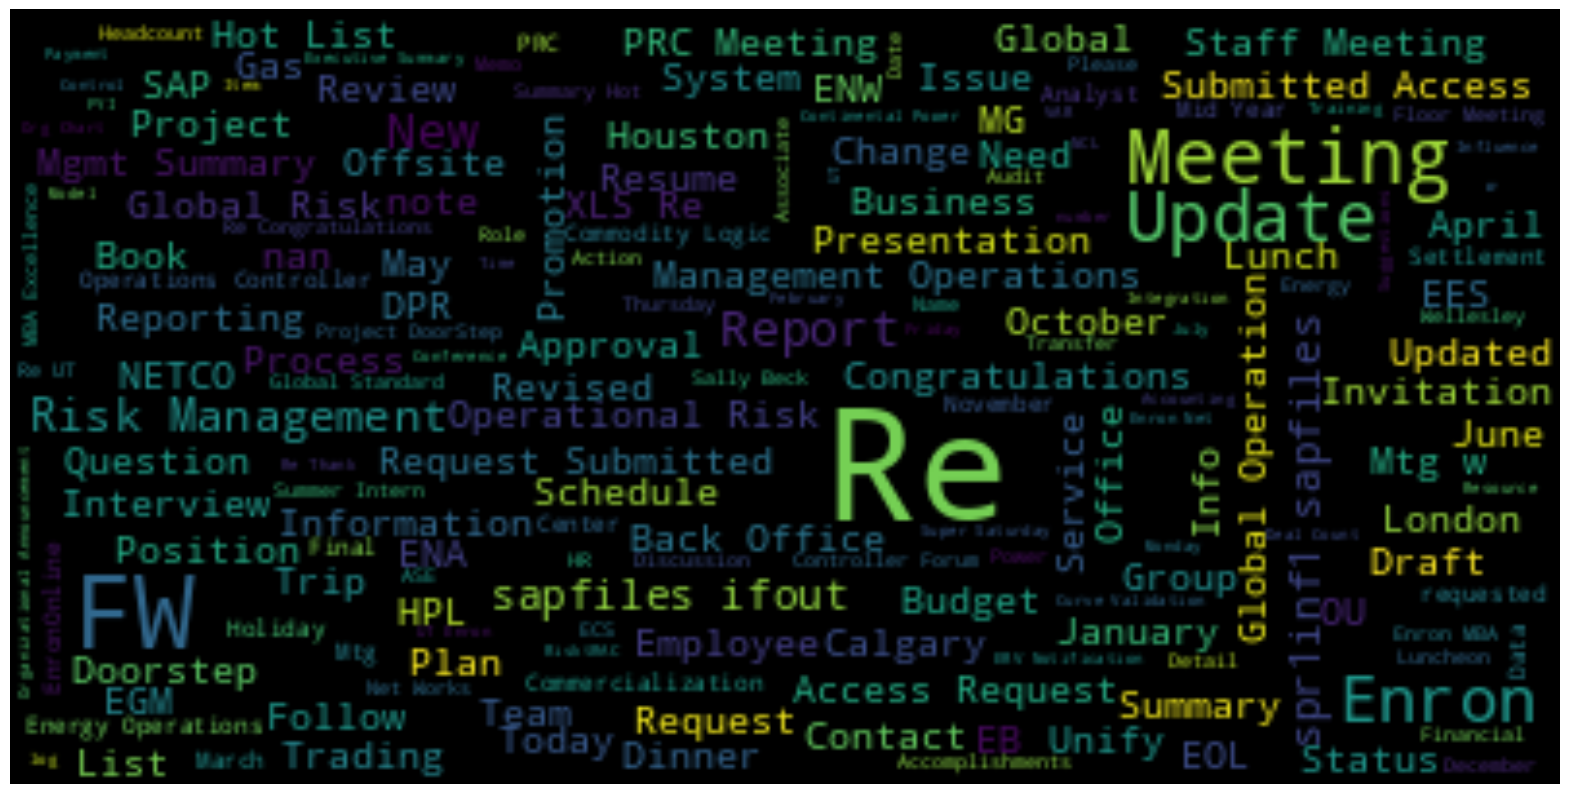

In [29]:
wordcloud = WordCloud(max_font_size=40,stopwords=STOPWORDS).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5 Filter all rows where subject contains Azurix and display heatmap as in 1

In [30]:
azurix = clean_df[clean_df['Subject'].str.contains("[Aa]zurix",na=False)]
azurix

DocID                                               From  \
4675    213210  sherri.reinartz@enron.com<sherri.reinartz@enro...   
5503     86996  stanley.horton@enron.com<stanley.horton@enron....   
16916    49326       karen.denne@enron.com<karen.denne@enron.com>   
26395    63764  tracy.geaccone@enron.com<tracy.geaccone@enron....   
27411    63077         j..parrish@enron.com<j..parrish@enron.com>   
...        ...                                                ...   
227102   81780               40enron@enron.com<40enron@enron.com>   
227296   63741  tracy.geaccone@enron.com<tracy.geaccone@enron....   
230976   63409       cindy.stark@enron.com<cindy.stark@enron.com>   
237025   49898         no.address@enron.com<no.address@enron.com>   
252427  113559       steven.kean@enron.com<steven.kean@enron.com>   

                                               Recipients  \
4675    michael.anderson@enron.com <michael.anderson@e...   
5503                      enron@eott.com <enron@eott.com>   
16916   kenneth.lay@enron.com <kenneth.lay@enron.com>;...   
26395       cindy.stark@enron.com <cindy.stark@enron.com>   
27411   tracy.geaccone@enron.com <tracy.geaccone@enron...   
...                                                   ...   
227102    rod.hayslett@enron.com <rod.hayslett@enron.com>   
227296  michael.anderson@enron.com <michael.anderson@e...   
230976  tracy.geaccone@enron.com <tracy.geaccone@enron...   
237025  james.derrick@enron.com <james.derrick@enron.c...   
252427  ricardo.charvel@enron.com <ricardo.charvel@enr...   

                                                   Cc                Date  \
4675                                              NaN 2000-02-24 18:00:00   
5503                                              NaN 2001-04-26 17:26:00   
16916   mark.palmer@enron.com <mark.palmer@enron.com> 2000-12-13 16:58:00   
26395                                             NaN 2001-10-03 20:19:47   
27411                                             NaN 2001-11-12 20:14:12   
...                                               ...                 ...   
227102                                            NaN 2001-05-22 21:41:21   
227296                                            NaN 2001-10-01 17:07:26   
230976                                            NaN 2001-10-02 23:56:54   
237025                                            NaN 2001-10-19 22:26:06   
252427                                            NaN 2000-11-07 11:04:00   

                                      Subject CustodianName         Location  \
4675    Re: Azurix Investment Banking Meeting    skilling-j       _sent_mail   
5503                          Re: Azurix/Enel      horton-s       _sent_mail   
16916                          Azurix Release     derrick-j    all_documents   
26395           FW:   Azurix 2002 Plan Review    geaccone-t       sent_items   
27411                           RE: Azurix CE    geaccone-t    deleted_items   
...                                       ...           ...              ...   
227102            Azurix/AWT Current Estimate    hayslett-r  projects\azurix   
227296                Azurix 2002 Plan Review    geaccone-t       sent_items   
230976            RE: Azurix 2002 Plan Review    geaccone-t            inbox   
237025                   Azurix's Case Themes     derrick-j            inbox   
252427                             Re: Azurix        kean-s    all_documents   

               Day  Count  
4675    2000-02-24      1  
5503    2001-04-26      1  
16916   2000-12-13      1  
26395   2001-10-03      1  
27411   2001-11-12      1  
...            ...    ...  
227102  2001-05-22      1  
227296  2001-10-01      1  
230976  2001-10-02      1  
237025  2001-10-19      1  
252427  2000-11-07      1  

[65 rows x 10 columns]

<Axes: xlabel='CustodianName', ylabel='Day'>

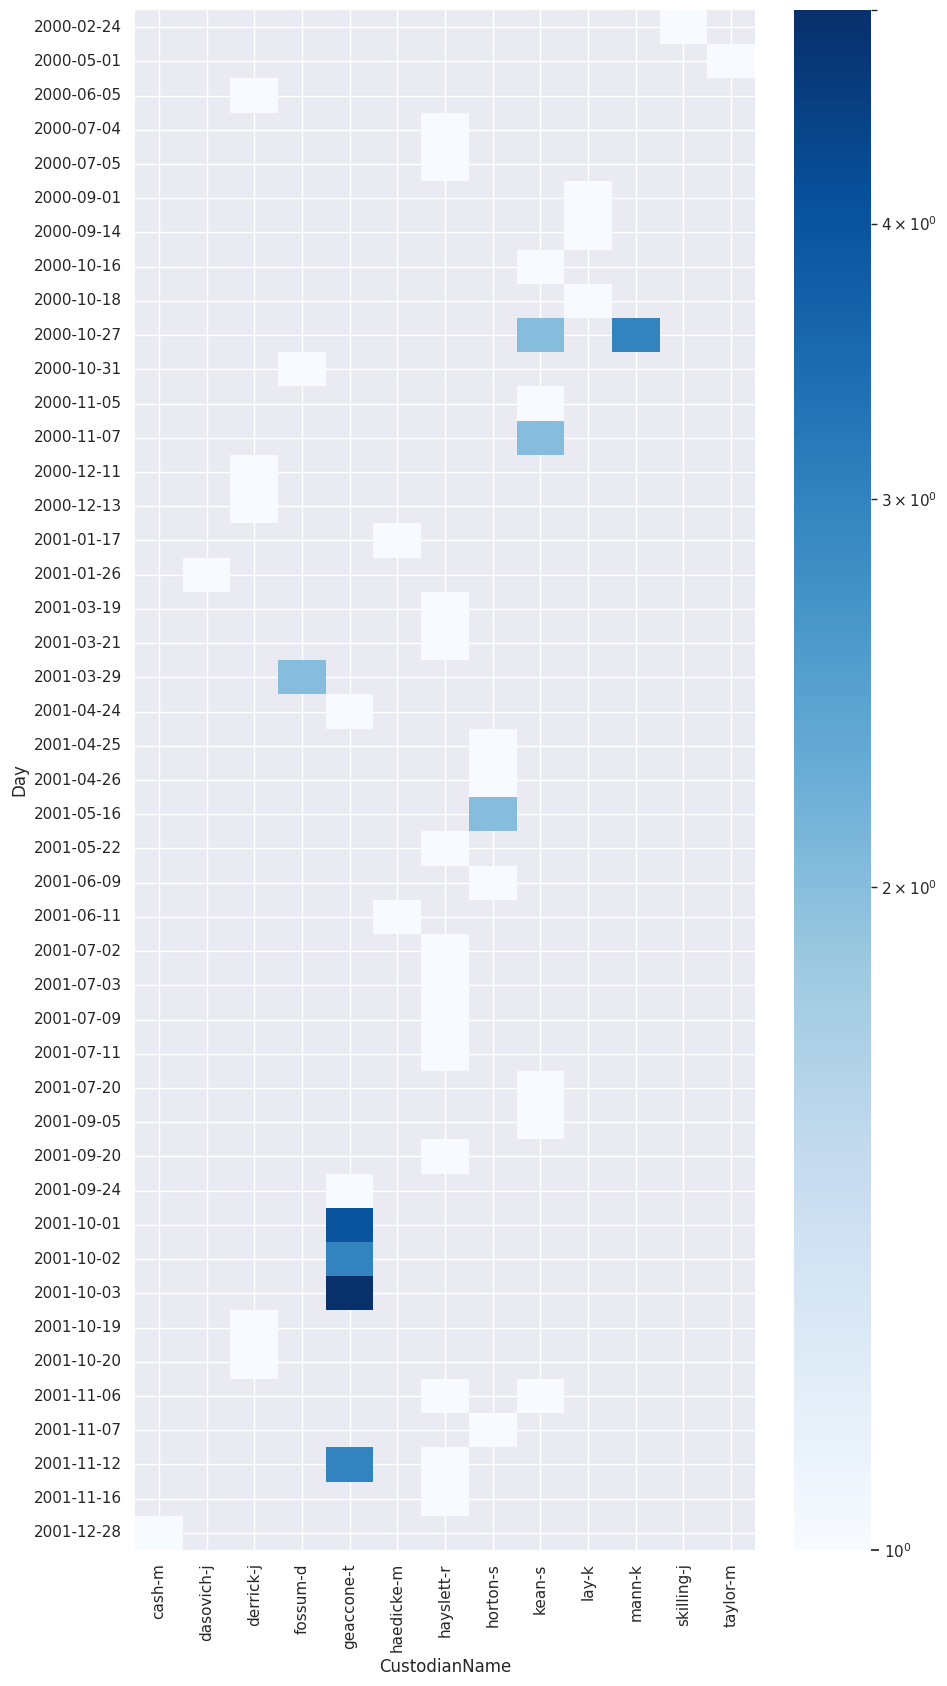

In [31]:
azurix_per_custodian_day = pd.pivot_table( azurix , values='Count',columns='CustodianName',index='Day', aggfunc="count")
azurix_per_custodian_day.fillna(0,inplace=True)
sns.set(rc = {'figure.figsize':(10,20)})
sns.heatmap(azurix_per_custodian_day, cmap="Blues",norm=LogNorm())


In [32]:
azurix_per_custodian_day

CustodianName  cash-m  dasovich-j  derrick-j  fossum-d  geaccone-t  \
Day                                                                  
2000-02-24        0.0         0.0        0.0       0.0         0.0   
2000-05-01        0.0         0.0        0.0       0.0         0.0   
2000-06-05        0.0         0.0        1.0       0.0         0.0   
2000-07-04        0.0         0.0        0.0       0.0         0.0   
2000-07-05        0.0         0.0        0.0       0.0         0.0   
2000-09-01        0.0         0.0        0.0       0.0         0.0   
2000-09-14        0.0         0.0        0.0       0.0         0.0   
2000-10-16        0.0         0.0        0.0       0.0         0.0   
2000-10-18        0.0         0.0        0.0       0.0         0.0   
2000-10-27        0.0         0.0        0.0       0.0         0.0   
2000-10-31        0.0         0.0        0.0       1.0         0.0   
2000-11-05        0.0         0.0        0.0       0.0         0.0   
2000-11-07        0.0         0.0        0.0       0.0         0.0   
2000-12-11        0.0         0.0        1.0       0.0         0.0   
2000-12-13        0.0         0.0        1.0       0.0         0.0   
2001-01-17        0.0         0.0        0.0       0.0         0.0   
2001-01-26        0.0         1.0        0.0       0.0         0.0   
2001-03-19        0.0         0.0        0.0       0.0         0.0   
2001-03-21        0.0         0.0        0.0       0.0         0.0   
2001-03-29        0.0         0.0        0.0       2.0         0.0   
2001-04-24        0.0         0.0        0.0       0.0         1.0   
2001-04-25        0.0         0.0        0.0       0.0         0.0   
2001-04-26        0.0         0.0        0.0       0.0         0.0   
2001-05-16        0.0         0.0        0.0       0.0         0.0   
2001-05-22        0.0         0.0        0.0       0.0         0.0   
2001-06-09        0.0         0.0        0.0       0.0         0.0   
2001-06-11        0.0         0.0        0.0       0.0         0.0   
2001-07-02        0.0         0.0        0.0       0.0         0.0   
2001-07-03        0.0         0.0        0.0       0.0         0.0   
2001-07-09        0.0         0.0        0.0       0.0         0.0   
2001-07-11        0.0         0.0        0.0       0.0         0.0   
2001-07-20        0.0         0.0        0.0       0.0         0.0   
2001-09-05        0.0         0.0        0.0       0.0         0.0   
2001-09-20        0.0         0.0        0.0       0.0         0.0   
2001-09-24        0.0         0.0        0.0       0.0         1.0   
2001-10-01        0.0         0.0        0.0       0.0         4.0   
2001-10-02        0.0         0.0        0.0       0.0         3.0   
2001-10-03        0.0         0.0        0.0       0.0         5.0   
2001-10-19        0.0         0.0        1.0       0.0         0.0   
2001-10-20        0.0         0.0        1.0       0.0         0.0   
2001-11-06        0.0         0.0        0.0       0.0         0.0   
2001-11-07        0.0         0.0        0.0       0.0         0.0   
2001-11-12        0.0         0.0        0.0       0.0         3.0   
2001-11-16        0.0         0.0        0.0       0.0         0.0   
2001-12-28        1.0         0.0        0.0       0.0         0.0   

CustodianName  haedicke-m  hayslett-r  horton-s  kean-s  lay-k  mann-k  \
Day                                                                      
2000-02-24            0.0         0.0       0.0     0.0    0.0     0.0   
2000-05-01            0.0         0.0       0.0     0.0    0.0     0.0   
2000-06-05            0.0         0.0       0.0     0.0    0.0     0.0   
2000-07-04            0.0         1.0       0.0     0.0    0.0     0.0   
2000-07-05            0.0         1.0       0.0     0.0    0.0     0.0   
2000-09-01            0.0         0.0       0.0     0.0    1.0     0.0   
2000-09-14            0.0         0.0       0.0     0.0    1.0     0.0   
2000-10-16            0.0         0.0      

In [34]:
# note: dates are missing on the x-axis. Solve this by creating a new dataframe that has all days
# between 1-1-1997 and 1-1-2002 and then join it with the azurix data frame before plotting

df = pd.DataFrame()
df['Day'] = pd.date_range(start='1-2-2000',end='1-1-2002',freq='D')
df['Day'] = pd.to_datetime(df['Day']).dt.date
df['Count'] = 0.1
df['CustodianName'] = "Ignore"

df2 = pd.concat([azurix, df], ignore_index=True)
df2


DocID                                               From  \
0    213210.0  sherri.reinartz@enron.com<sherri.reinartz@enro...   
1     86996.0  stanley.horton@enron.com<stanley.horton@enron....   
2     49326.0       karen.denne@enron.com<karen.denne@enron.com>   
3     63764.0  tracy.geaccone@enron.com<tracy.geaccone@enron....   
4     63077.0         j..parrish@enron.com<j..parrish@enron.com>   
..        ...                                                ...   
791       NaN                                                NaN   
792       NaN                                                NaN   
793       NaN                                                NaN   
794       NaN                                                NaN   
795       NaN                                                NaN   

                                            Recipients  \
0    michael.anderson@enron.com <michael.anderson@e...   
1                      enron@eott.com <enron@eott.com>   
2    kenneth.lay@enron.com <kenneth.lay@enron.com>;...   
3        cindy.stark@enron.com <cindy.stark@enron.com>   
4    tracy.geaccone@enron.com <tracy.geaccone@enron...   
..                                                 ...   
791                                                NaN   
792                                                NaN   
793                                                NaN   
794                                                NaN   
795                                                NaN   

                                                Cc                Date  \
0                                              NaN 2000-02-24 18:00:00   
1                                              NaN 2001-04-26 17:26:00   
2    mark.palmer@enron.com <mark.palmer@enron.com> 2000-12-13 16:58:00   
3                                              NaN 2001-10-03 20:19:47   
4                                              NaN 2001-11-12 20:14:12   
..                                             ...                 ...   
791                                            NaN                 NaT   
792                                            NaN                 NaT   
793                                            NaN                 NaT   
794                                            NaN                 NaT   
795                                            NaN                 NaT   

                                   Subject CustodianName       Location  \
0    Re: Azurix Investment Banking Meeting    skilling-j     _sent_mail   
1                          Re: Azurix/Enel      horton-s     _sent_mail   
2                           Azurix Release     derrick-j  all_documents   
3            FW:   Azurix 2002 Plan Review    geaccone-t     sent_items   
4                            RE: Azurix CE    geaccone-t  deleted_items   
..                                     ...           ...            ...   
791                                    NaN        Ignore            NaN   
792                                    NaN        Ignore            NaN   
793                                    NaN        Ignore            NaN   
794                                    NaN        Ignore            NaN   
795                                    NaN        Ignore            NaN   

            Day  Count  
0    2000-02-24    1.0  
1    2001-04-26    1.0  
2    2000-12-13    1.0  
3    2001-10-03    1.0  
4    2001-11-12    1.0  
..          ...    ...  
791  2001-12-28    0.1  
792  2001-12-29    0.1  
793  2001-12-30    0.1  
794  2001-12-31    0.1  
795  2002-01-01    0.1  

[796 rows x 10 columns]

<Axes: xlabel='CustodianName', ylabel='Day'>

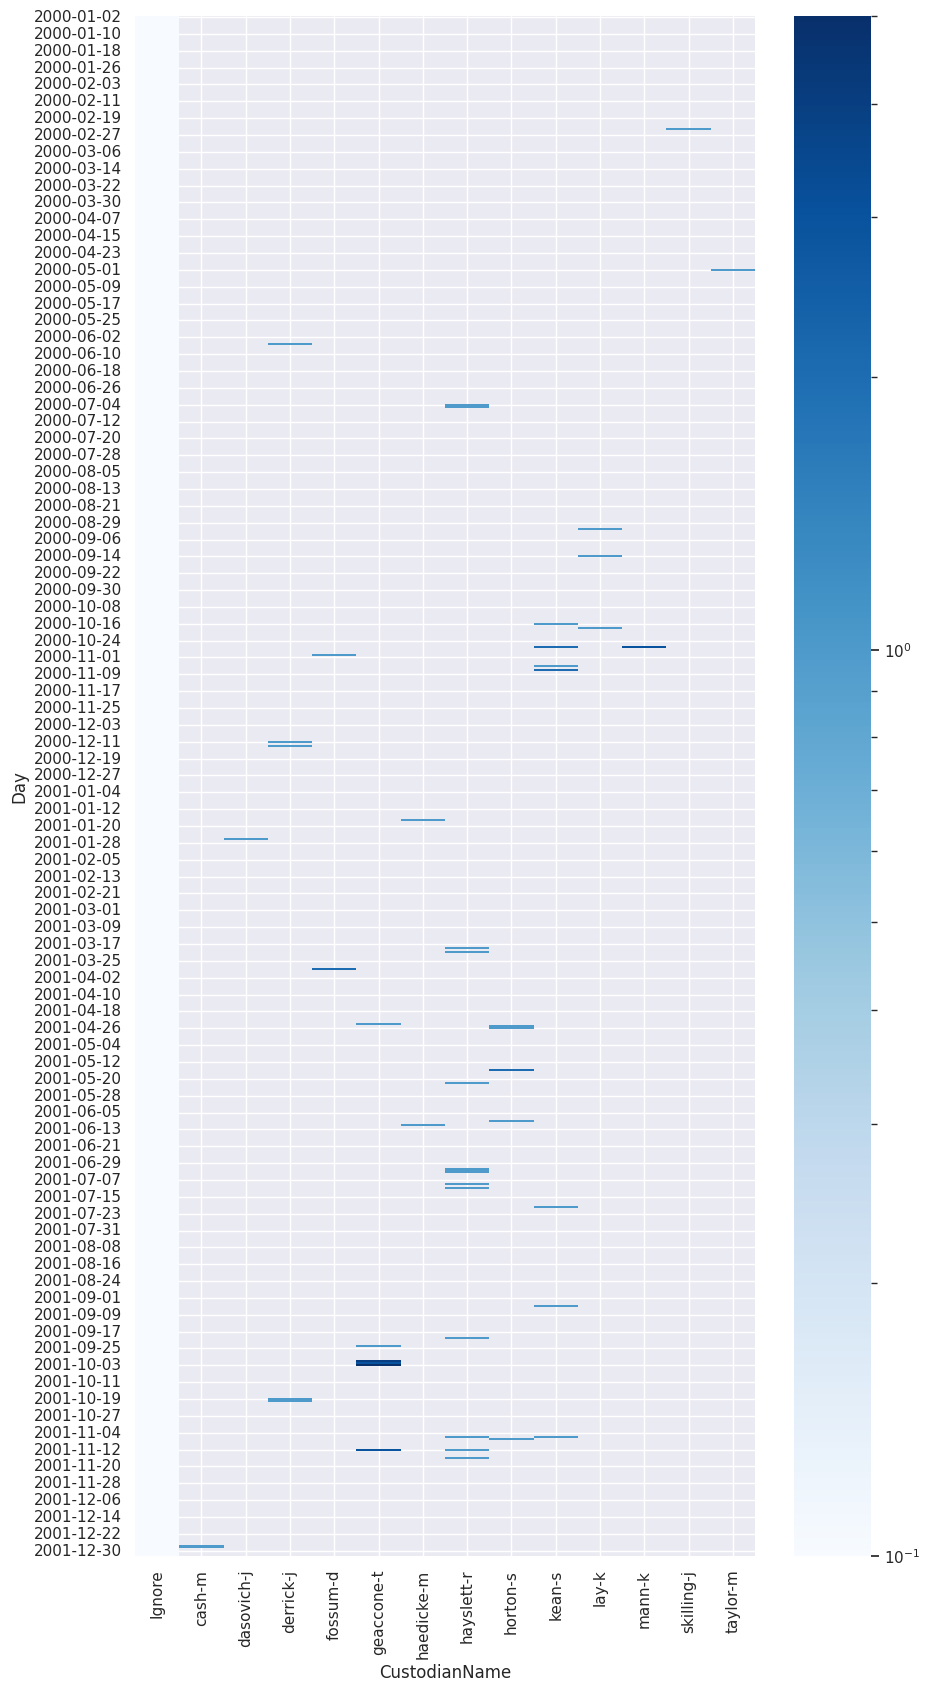

In [35]:
df2_per_custodian_day = pd.pivot_table( df2 , values='Count',columns='CustodianName',index='Day', aggfunc="sum")
df2_per_custodian_day.fillna(0,inplace=True)
sns.heatmap(df2_per_custodian_day, cmap="Blues",norm=LogNorm())

## 6 Generate a barplot with time horizontal in weeks and bar height set to emails containing Azurix in the subject as a % of the total number of emails in that week

In [39]:
# Create a year and a week column for the full dataset clean_df

clean_df['Year']=clean_df['Date'].dt.year
clean_df['Week']=clean_df['Date'].dt.isocalendar().week
clean_df

<ipython-input-39-9f462d8f8aff>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-9f462d8f8aff>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



DocID                                               From  \
0       175231           m..presto@enron.com<m..presto@enron.com>   
1       232669  magdelena.cruz@enron.com<magdelena.cruz@enron....   
2       178812       becky.pitre@enron.com<becky.pitre@enron.com>   
3         5834           eric.bass@enron.com<eric.bass@enron.com>   
4       187302  cara.semperger@enron.com<cara.semperger@enron....   
...        ...                                                ...   
252959  213891       ashley.kerr@enron.com<ashley.kerr@enron.com>   
252961  215514         matt.smith@enron.com<matt.smith@enron.com>   
252962  219842         d..steffes@enron.com<d..steffes@enron.com>   
252963   10820         sally.beck@enron.com<sally.beck@enron.com>   
252964  221465             perfmgmt@enron.com<perfmgmt@enron.com>   

                                               Recipients  \
0             tim.belden@enron.com <tim.belden@enron.com>   
1                 e.taylor@enron.com <e.taylor@enron.com>   
2         richard.ring@enron.com <richard.ring@enron.com>   
3       shanna.husser@enron.com <shanna.husser@enron.c...   
4       shift.portland@enron.com <shift.portland@enron...   
...                                                   ...   
252959  janiceavery78@hotmail.com <janiceavery78@hotma...   
252961          asalazar@pirnie.com <asalazar@pirnie.com>   
252962  c..williams@enron.com <c..williams@enron.com>;...   
252963            bob.hall@enron.com <bob.hall@enron.com>   
252964  stepenovitch@enron.com <stepenovitch@enron.com...   

                                                       Cc                Date  \
0                                                     NaN 2001-10-16 21:28:28   
1                                                     NaN 2001-07-12 18:23:41   
2                                                     NaN 2001-10-23 22:26:39   
3                                                     NaN 2000-08-07 13:51:00   
4                                                     NaN 2001-06-23 01:05:41   
...                                                   ...                 ...   
252959  angela.schwarz@enron.com <angela.schwarz@enron... 2001-08-09 01:06:37   
252961                                                NaN 2001-02-28 17:08:00   
252962  wanda.curry@enron.com <wanda.curry@enron.com>;... 2001-10-10 23:18:22   
252963                                                NaN 2001-01-17 09:21:00   
252964                                                NaN 2001-05-22 07:47:00   

                                   Subject   CustodianName         Location  \
0                               Son Onofre        presto-k       sent_items   
1                    FW: DB# User Feedback        taylor-m  inbox\passwords   
2              FW: Termination Proceedings          ring-r            inbox   
3                                  Austin?          bass-e       _sent_mail   
4             IDAHO HAS A NEW NERC ACRONYM     salisbury-h            inbox   
...                                    ...             ...              ...   
252959            Re: Alternative proposal      skilling-j    deleted_items   
252961                                 RE:         smith-m       _sent_mail   
252962                RE: SCE Late Charges       steffes-j       sent_items   
252963                   Re: Good Morning.          beck-s       _sent_mail   
252964  Mid-Year 2001 Performance Feedback  stepenovitch-j  inbox\work_mail   

               Day  Count  Year  Week  
0       2001-10-16      1  2001    42  
1       2001-07-12      1  2001    28  
2       2001-10-23      1  2001    43  
3       2000-08-07      1  2000    32  
4       2001-06-23      1  2001    25  
...            ...    ...   ...   ...  
252959  2001-08-09      1  2001    32  
252961  2001-02-28      1  2001     9  
252962  2001-10-10      1  2001    41  
252963  2001-01-17      1  2001     3  
252964  2001-05-22      1  2001    21  

[223792 rows x 12 columns]

In [40]:
emails_per_day = pd.pivot_table( clean_df , values='Count',index=['Year','Week'], aggfunc="sum")
emails_per_day


Count
Year Week       
1999 1        15
     2        22
     3        14
     4        14
     5        12
...          ...
2001 48     5576
     49     1971
     50     2290
     51     2716
     52     2035

[156 rows x 1 columns]

In [42]:
# Emails containing Azurix in the subject per year, week. We can use the azurix dataframe that was created in example 5

azurix['Year']=azurix['Date'].dt.year
azurix['Week']=azurix['Date'].dt.isocalendar().week

azurix_emails_per_day = pd.pivot_table( azurix , values="Count", index=['Year','Week'], aggfunc="sum")
azurix_emails_per_day


<ipython-input-42-762634dca972>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-762634dca972>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Count
Year Week       
2000 8         1
     18        1
     23        1
     27        2
     35        1
     37        1
     42        2
     43        5
     44        2
     45        2
     50        2
2001 3         1
     4         1
     12        2
     13        2
     17        3
     20        2
     21        1
     23        1
     24        1
     27        2
     28        2
     29        1
     36        1
     38        1
     39        1
     40       12
     42        2
     45        3
     46        5
     52        1

In [43]:
# We combine both tables in a new dataframe mdf by merging emails per day with azurix emails per day

df_combined=emails_per_day.merge(azurix_emails_per_day, on=['Year','Week'], how='left',suffixes=('_total', '_azurix'))
df_combined=df_combined.fillna(0)
df_combined['Percentage'] = (df_combined['Count_azurix'] /df_combined['Count_total'] * 100)
df_combined


Count_total  Count_azurix  Percentage
Year Week                                       
1999 1              15           0.0     0.00000
     2              22           0.0     0.00000
     3              14           0.0     0.00000
     4              14           0.0     0.00000
     5              12           0.0     0.00000
...                ...           ...         ...
2001 48           5576           0.0     0.00000
     49           1971           0.0     0.00000
     50           2290           0.0     0.00000
     51           2716           0.0     0.00000
     52           2035           1.0     0.04914

[156 rows x 3 columns]

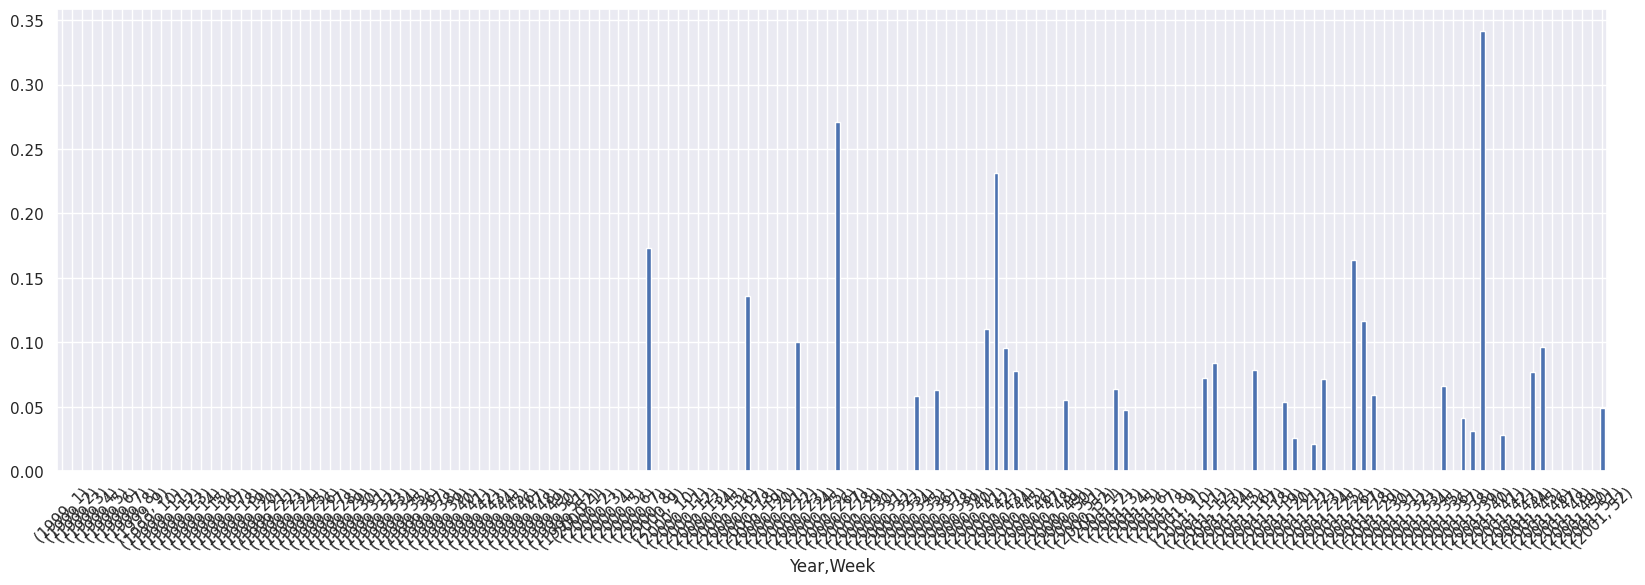

In [45]:

ax = df_combined['Percentage'].plot.bar(rot=45,figsize=(20, 6))

## 7 **Advanced** Select a subset of addresses

So that you get a connected graph that can be displayed in Colab with labels in a readable way

Calculate centrality and visually validate if it is (approximately) correct

In [51]:
# In the published paper there is Table 1 with hub's and authorities in the network.
# Here is the table with id's of the addresses in the last column
#
# Address	                    Type	        Id
# sue.nord@enron.com	        Hub	          3896
# henry.means@enron.com       Hub	          5145
# angela.wilson@enron.com     Hub	          3990
# sharonda.stephens@enron.com Hub/Authority	3940
# ann.schmidt@enron.com       Hub/Authority	3188
# jeff.dasovich@enron.com     Authority     7005
# steven.kean@enron.com       Authority      192
# karen.denne@enron.com       Authority      202
#
# let's select rows from the relations[] df that only have one of these id's
#
table1_persons = relations[(\
           (relations.From==3896) |\
           (relations.From==5145) |\
           (relations.From==3990) |\
           (relations.From==3940) |\
           (relations.From==3188) |\
           (relations.From==7005) |\
           (relations.From==192) |\
           (relations.From==202) )\
          &\
          ((relations.To_Cc==3896) |\
           (relations.To_Cc==5145) |\
           (relations.To_Cc==3990) |\
           (relations.To_Cc==3940) |\
           (relations.To_Cc==3188) |\
           (relations.To_Cc==7005) |\
           (relations.To_Cc==192) |\
           (relations.To_Cc==202)\
           )]

G1 = nx.from_pandas_edgelist(table1_persons, source='From', target='To_Cc')

In [52]:
table1_persons

From  To_Cc  CountOfDocId
18881    192    192            17
18887    192    202            54
19046    192   3188             5
19075    192   3896             3
20124    202    192            92
20129    202    202            30
20272    202   3188             7
20300    202   3940             1
20345    202   5145             2
137366  3188    192            43
137367  3188    202            36
137379  3188   3188            13
137390  3188   3940             9
137413  3188   5145             7
150162  3940    192            23
150163  3940    202            23
150179  3940   3188             4
150190  3940   3940            26
150214  3940   5145            22
152601  3990    192             8
152603  3990    202             8
152651  3990   3188             8
152670  3990   3896             1
152684  3990   3940             1
152691  3990   3990             1
152704  3990   5145             1
176282  5145    192             7
176283  5145    202             6
176306  5145   3940             6
176330  5145   5145             6

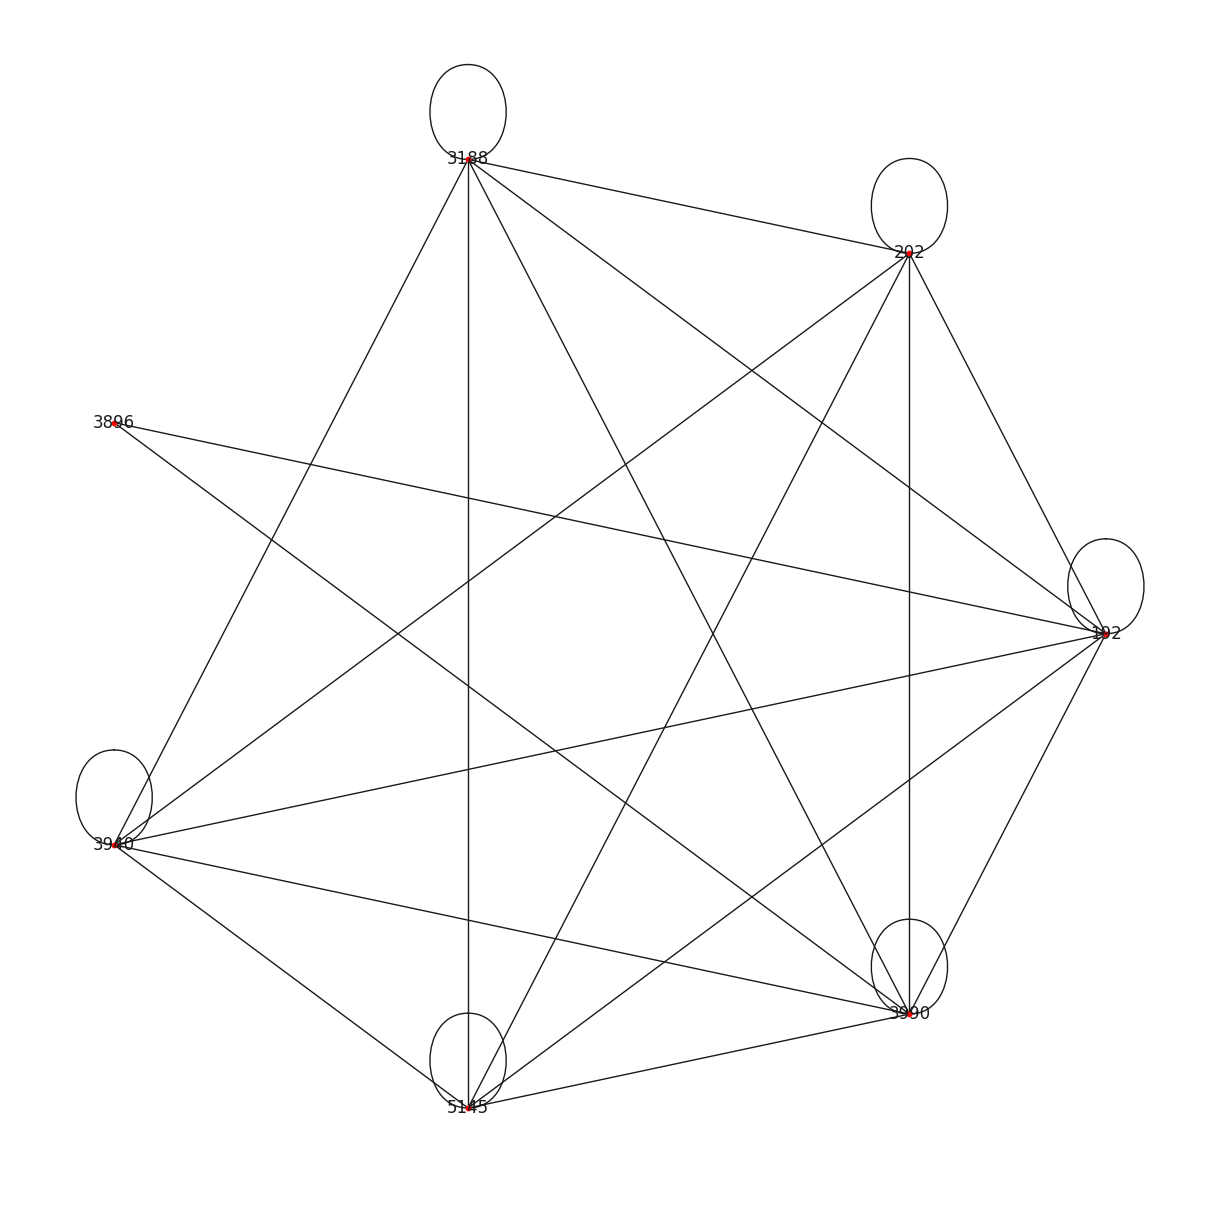

In [53]:
#nx.draw_networkx(G1,node_size=10,node_color='red',with_labels=True)
plt.figure(figsize=(12,12))
nx.draw_circular(G1,node_size=10,node_color='red',with_labels=True)
plt.show()

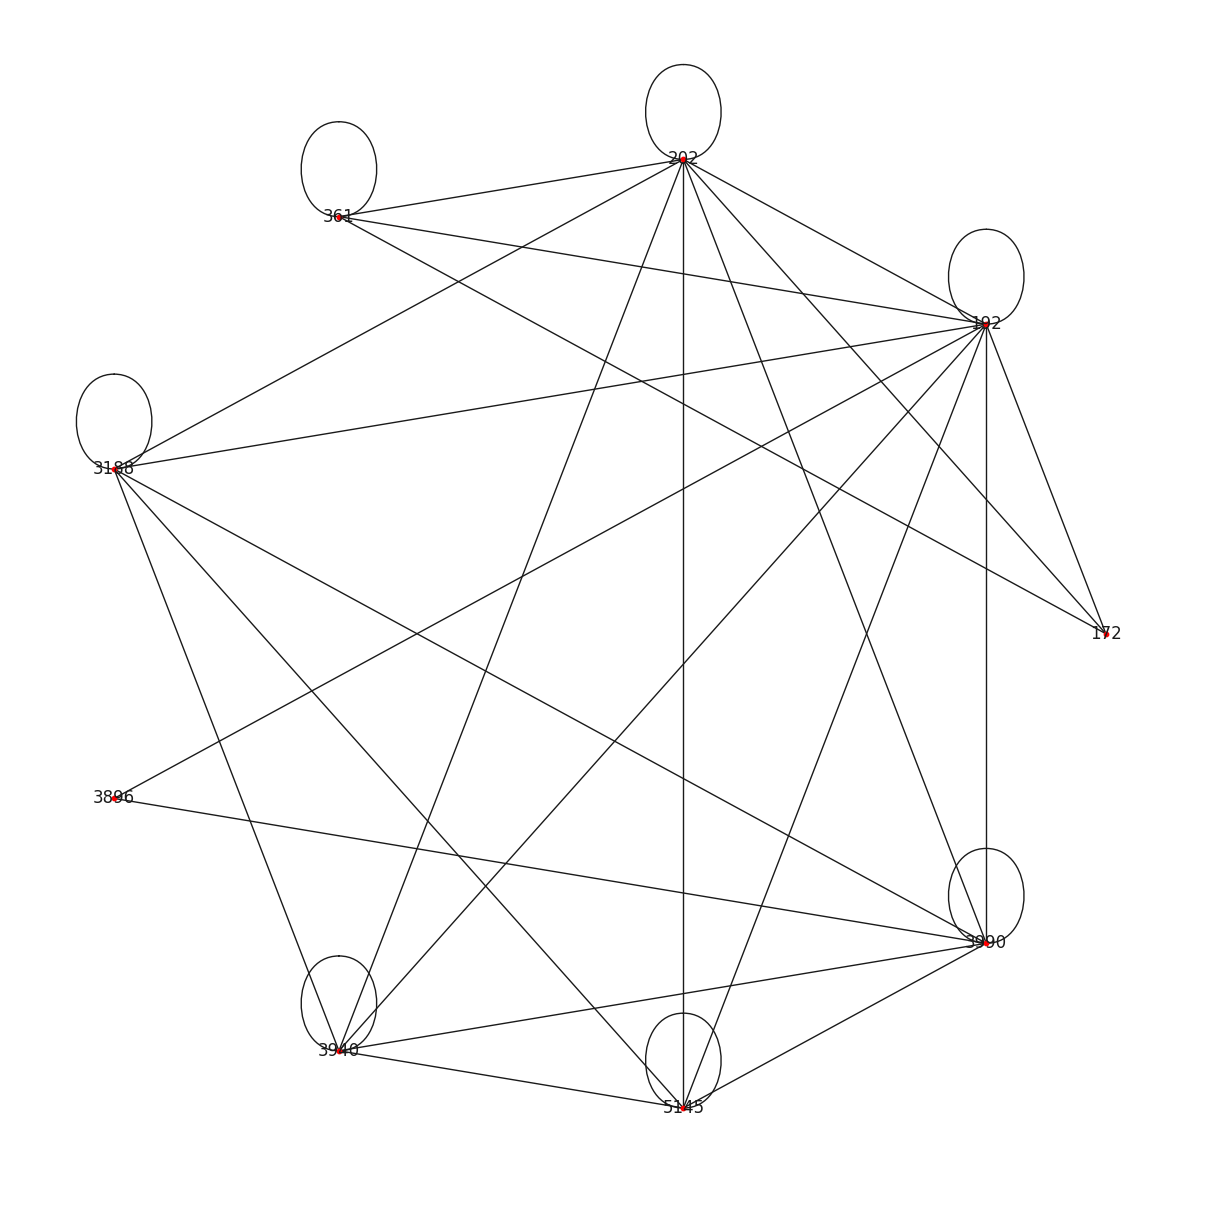

In [54]:
# Now add the ceo skilling-j and ken-l to the relations
#
#   kenneth.lay@enron.com = 361
#   jeff.skilling@enron.com = 172


table2_persons = relations[(\
           (relations.From==3896) |\
           (relations.From==5145) |\
           (relations.From==3990) |\
           (relations.From==3940) |\
           (relations.From==3188) |\
           (relations.From==7005) |\
           (relations.From==192) |\
           (relations.From==202) |\
           (relations.From==361) |\
           (relations.From==172) )\
          &\
          ((relations.To_Cc==3896) |\
           (relations.To_Cc==5145) |\
           (relations.To_Cc==3990) |\
           (relations.To_Cc==3940) |\
           (relations.To_Cc==3188) |\
           (relations.To_Cc==7005) |\
           (relations.To_Cc==192) |\
           (relations.To_Cc==202) |\
           (relations.To_Cc==361) |\
           (relations.To_Cc==172)\
           )]

G2 = nx.from_pandas_edgelist(table2_persons, source='From', target='To_Cc')
plt.figure(figsize=(12,12))
nx.draw_circular(G2,node_size=10,node_color='red',with_labels=True,font_size=12)
plt.show()

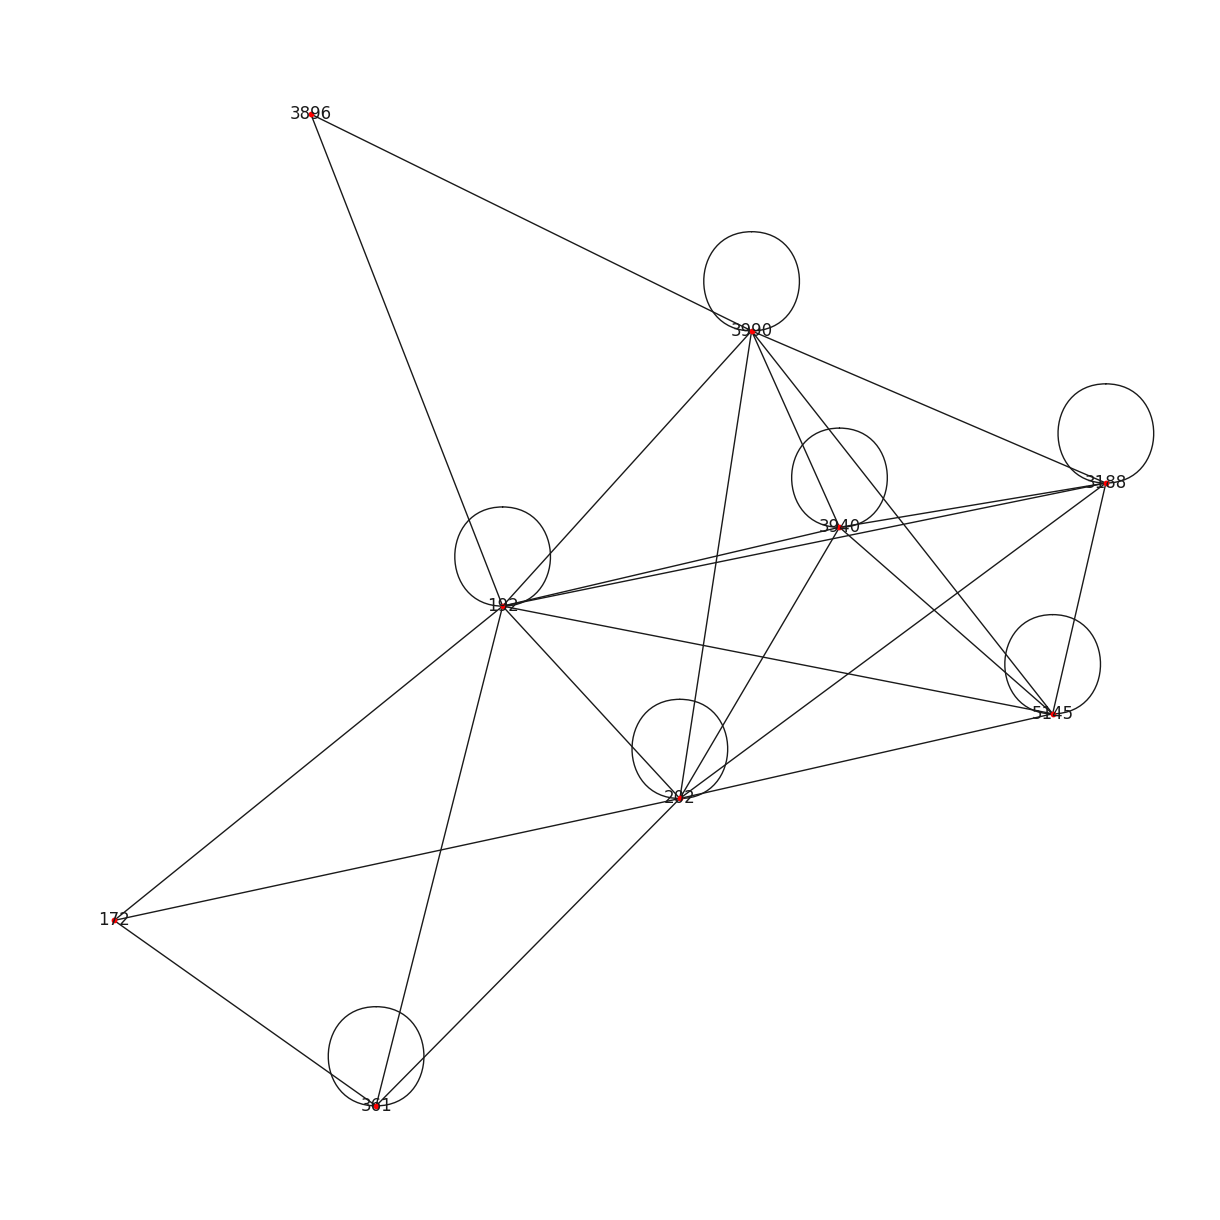

In [55]:
plt.figure(figsize=(12,12))
nx.draw_spring(G2,node_size=10,node_color='red',with_labels=True,font_size=12)
plt.show()

In [58]:
dict1 = nx.algorithms.centrality.degree_centrality(G2)
top10(dict1)
print("degree:",sorted(dict1, key=dict1.get,reverse=True))
dict1 = nx.algorithms.centrality.betweenness_centrality(G2)
print("betweenness",sorted(dict1, key=dict1.get,reverse=True))
dict1 = nx.algorithms.centrality.eigenvector_centrality(G2)
print("eigenvector",sorted(dict1, key=dict1.get,reverse=True))
dict1 = nx.algorithms.centrality.closeness_centrality(G2)
print("closeness",sorted(dict1, key=dict1.get,reverse=True))

0.007999240428208598 	 steven.kean@enron.com  (id: 192 )
0.005257660993614849 	 karen.denne@enron.com  (id: 202 )
0.001839587932303164 	 angela.wilson@enron.com  (id: 3990 )
0.001115621068622564 	 ann.schmidt@enron.com  (id: 3188 )
0.0012936457072325477 	 sharonda.stephens@enron.com  (id: 3940 )
0.001174962614825892 	 henry.means@enron.com  (id: 5145 )
0.020947565809774738 	 kenneth.lay@enron.com  (id: 361 )
0.01767191245935104 	 jeff.skilling@enron.com  (id: 172 )
0.0017090365306558428 	 sue.nord@enron.com  (id: 3896 )
degree: [192, 202, 3990, 3188, 3940, 5145, 361, 172, 3896]
betweenness [192, 202, 3990, 172, 361, 3188, 3896, 3940, 5145]
eigenvector [192, 202, 3990, 3188, 3940, 5145, 361, 172, 3896]
closeness [192, 202, 3990, 3188, 3940, 5145, 172, 361, 3896]


In [59]:
# So who are Karen Denne en Steven Kene? Karen Denne was VP of public relations and Steven Kean was chief of staff